## Problem 1
Context
CNBE, a prominent news channel, is gearing up to provide insightful coverage of recent elections, recognizing the importance of data-driven analysis. A comprehensive survey has been conducted, capturing the perspectives of 1525 voters across various demographic and socio-economic factors. This dataset encompasses 9 variables, offering a rich source of information regarding voters' characteristics and preferences.

Objective
The primary objective is to leverage machine learning to build a predictive model capable of forecasting which political party a voter is likely to support. This predictive model, developed based on the provided information, will serve as the foundation for creating an exit poll. The exit poll aims to contribute to the accurate prediction of the overall election outcomes, including determining which party is likely to secure the majority of seats.

Data Description
1) vote: Party choice: Conservative or Labour
2) age: in years
3) economic.cond.national: Assessment of current national economic conditions, 1 to 5.
4) economic.cond.household: Assessment of current household economic conditions, 1 to 5.
5) Blair: Assessment of the Labour leader, 1 to 5.
6) Hague: Assessment of the Conservative leader, 1 to 5.
7) Europe: an 11-point scale that measures respondents' attitudes toward European integration.   High scores represent ‘Eurosceptic’ sentiment.
8) political.knowledge: Knowledge of parties' positions on European integration, 0 to 3.
9) gender: female or male.

In [1]:
import numpy as np
import pandas as pd

# for visulaization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore
from sklearn.model_selection import train_test_split


In [2]:
data_df = pd.read_excel('C://Users//subra//Downloads//Election_Data.xlsx')

In [3]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               1525 non-null   int64 
 1   vote                     1525 non-null   object
 2   age                      1525 non-null   int64 
 3   economic.cond.national   1525 non-null   int64 
 4   economic.cond.household  1525 non-null   int64 
 5   Blair                    1525 non-null   int64 
 6   Hague                    1525 non-null   int64 
 7   Europe                   1525 non-null   int64 
 8   political.knowledge      1525 non-null   int64 
 9   gender                   1525 non-null   object
dtypes: int64(8), object(2)
memory usage: 119.3+ KB


#### There are total 10 columns. 8 are integer type and two are object.

In [4]:
data_df.shape

(1525, 10)

#### There are total 1525 entries with 10 columns.

In [5]:
data_df.head()

,Unnamed: 0,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,1,Labour,43,3,3,4,1,2,2,female
1,2,Labour,36,4,4,4,4,5,2,male
2,3,Labour,35,4,4,5,2,3,2,male
3,4,Labour,24,4,2,2,1,4,0,female
4,5,Labour,41,2,2,1,1,6,2,male


In [6]:
data_df.tail()

,Unnamed: 0,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
1520,1521,Conservative,67,5,3,2,4,11,3,male
1521,1522,Conservative,73,2,2,4,4,8,2,male
1522,1523,Labour,37,3,3,5,4,2,2,male
1523,1524,Conservative,61,3,3,1,4,11,2,male
1524,1525,Conservative,74,2,3,2,4,11,0,female


## Check the summary statistics

In [7]:
data_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,1525.0,763.000000,440.373894,1.0,382.0,763.0,1144.0,1525.0
age,1525.0,54.182295,15.711209,24.0,41.0,53.0,67.0,93.0
economic.cond.national,1525.0,3.245902,0.880969,1.0,3.0,3.0,4.0,5.0
economic.cond.household,1525.0,3.140328,0.929951,1.0,3.0,3.0,4.0,5.0
Blair,1525.0,3.334426,1.174824,1.0,2.0,4.0,4.0,5.0
Hague,1525.0,2.746885,1.230703,1.0,2.0,2.0,4.0,5.0
Europe,1525.0,6.728525,3.297538,1.0,4.0,6.0,10.0,11.0
political.knowledge,1525.0,1.542295,1.083315,0.0,0.0,2.0,2.0,3.0


### Observations:
1. The min age group of people comes in 20's and max is going up to 93. So, there are no underage group of people who don't have right to vote.
2. The national economic conditional is a measure of economic health of the country at given time. Right from GDP, Inflation Rate, Unemployment rate, Business investment etc. The min is 1 and max is 5. The average stands around 3 and assessment of national for average 3 is 607 in total.
3. Economic conditions of households refer to how the individual house is affected with the economy change. For instance,  increase of rent, Cost of living, increase in debt, income levels. Here the min value is 1 and max is 5 with average is 3. i.e. there are mid-range families more 648.
4. The Person Blair is evaluated for the position of labour leader from a scale of 1 to 5. The min assessment was 1 given by just 3 people that means he has performed very poorly. But looks like he has served pretty well since he is rated 4 by majority of people.
5. The Person Hague is evaluated for the position of conservative leader, an opposition party of labour leader. The min assessment was 1 given by 233 people that means he has performed very poorly. He was rated 4 by 558 people. But majority seems to rate him around 2. Hence, he might not be good choice.
6. A survey on political, social, economic, culture integration with European countries. The scale of highest vote refers people being not okay with the change. 338 people are feeling negative about the change and only 79 people are okay with it. On average 101 people are in between.
7. The knowledge on European parties towards the integration is in average numbers. There are 455 people who are unaware of this and only 250 of them are aware of the change.

## Check the null value in the data

In [8]:
data_df.isnull().sum()

Unnamed: 0                 0
vote                       0
age                        0
economic.cond.national     0
economic.cond.household    0
Blair                      0
Hague                      0
Europe                     0
political.knowledge        0
gender                     0
dtype: int64

#### There are  no null values in the data

## Check on duplicate values

In [9]:
data_df.duplicated().sum()

0

#### There are no duplicate records in the dataset.

##### Drop the Unnamed column in data_df dataframe

In [10]:
data_df.drop('Unnamed: 0', axis=1,inplace=True)

In [11]:
## Let's rename columns.
data_df.rename(columns = {"economic.cond.national": "national_economic_cond","economic.cond.household": "national_economic_household","political.knowledge":"political_knowledge"},inplace=True)

In [12]:
data_df['vote'] = data_df['vote'].replace({'Labour': 1, 'Conservative':0}).astype('int64')
#data_df['gender'] = data_df['gender'].replace({'male': 1, 'female':0}).astype('int64')

## Split the dataset into numerical and categorical.

In [13]:
data_df_num = data_df.select_dtypes(['int64', 'float64'])
data_df_cat = data_df.select_dtypes(['object'])

In [14]:
data_df_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   vote                         1525 non-null   int64
 1   age                          1525 non-null   int64
 2   national_economic_cond       1525 non-null   int64
 3   national_economic_household  1525 non-null   int64
 4   Blair                        1525 non-null   int64
 5   Hague                        1525 non-null   int64
 6   Europe                       1525 non-null   int64
 7   political_knowledge          1525 non-null   int64
dtypes: int64(8)
memory usage: 95.4 KB


In [15]:
data_df_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   gender  1525 non-null   object
dtypes: object(1)
memory usage: 12.0+ KB


## Univariant analysis

vote


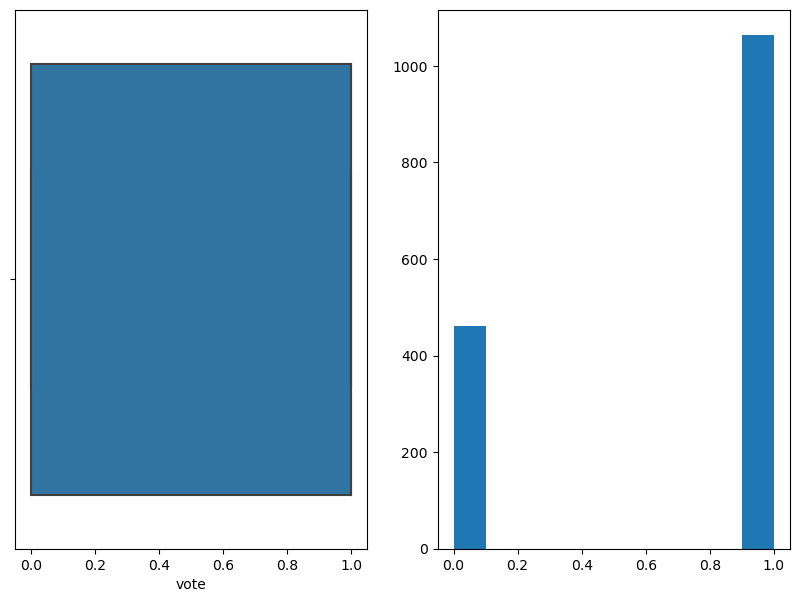

age


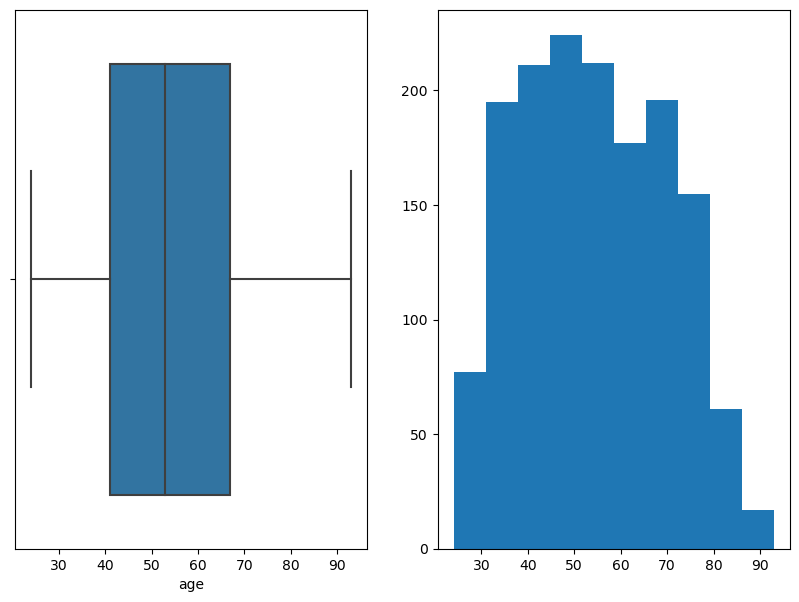

national_economic_cond


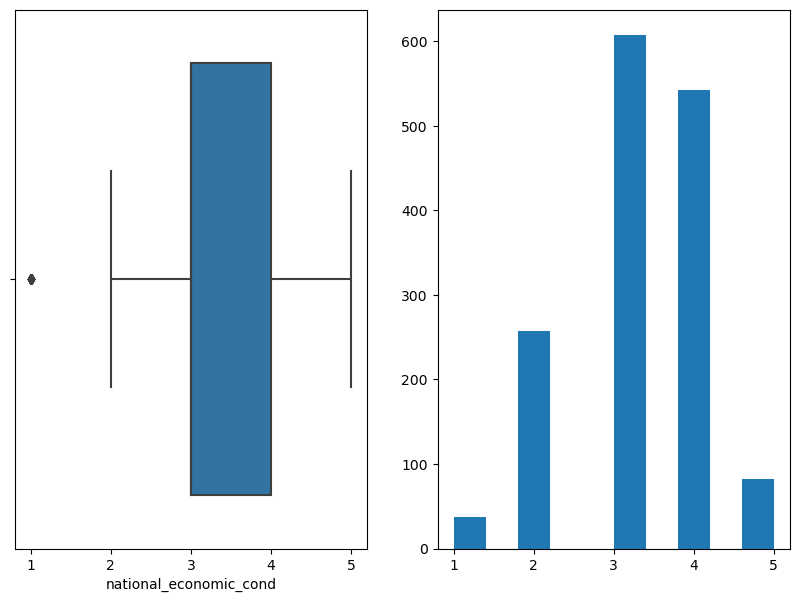

national_economic_household


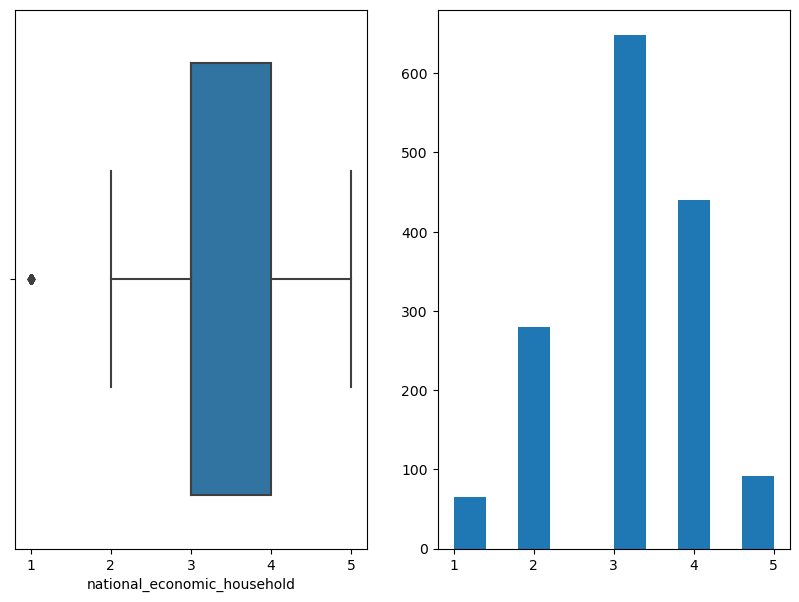

Blair


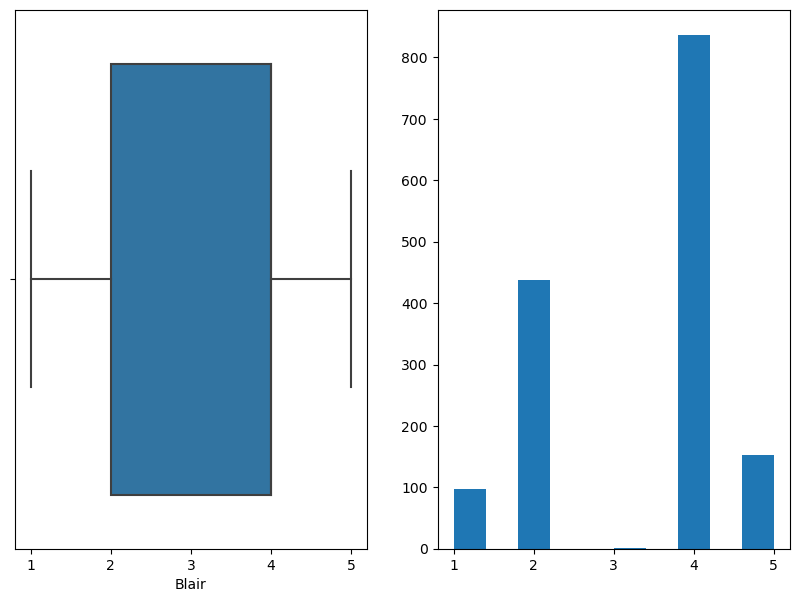

Hague


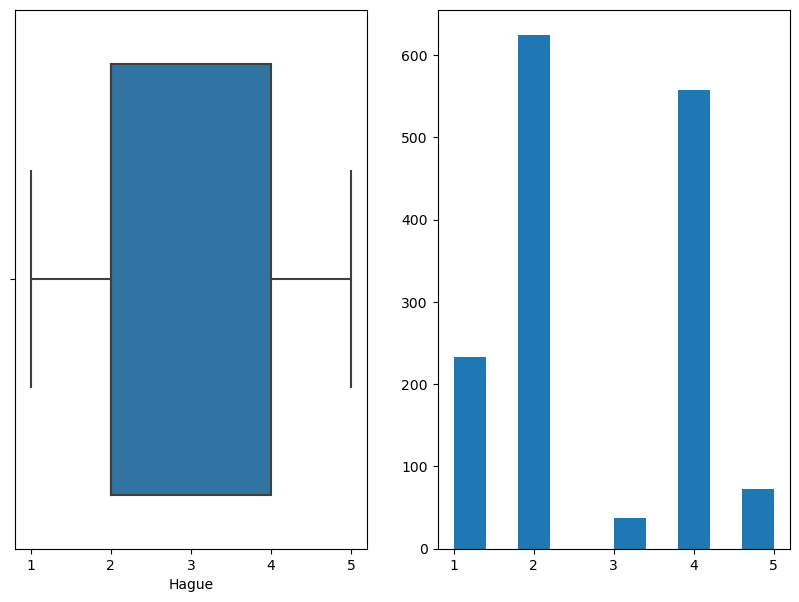

Europe


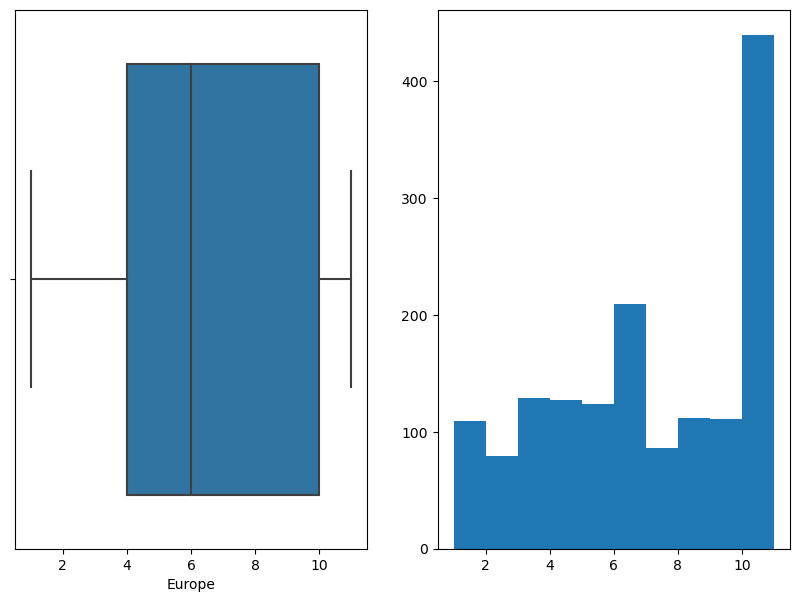

political_knowledge


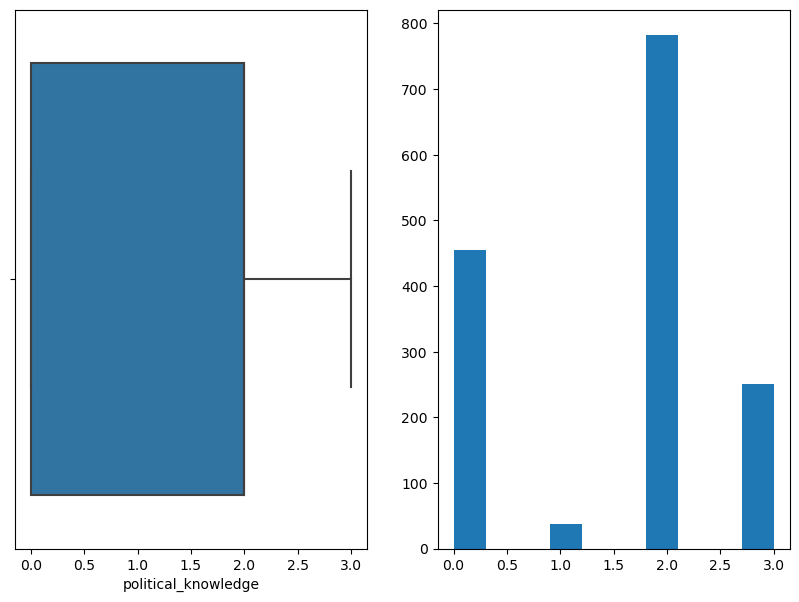

In [16]:
for feature in data_df_num[:]:
    print(feature)
    plt.figure(figsize=(10, 7))
    plt.subplot(1,2,1)
    sns.boxplot(x=data_df_num[feature])
    plt.subplot(1,2,2)
    plt.hist(x=data_df_num[feature])
    
    plt.show()

### Observations:

1) The age is normally distributed.The median is 53 and mean is 54.
2) national_economic_cond and national_economic_household is mean is 3 and median is also 3 with max value of 5. Both are left skewed.
3) Blair the labour leader is distributed with max value as 5.
4) Hague the conservative leaders are distributed with mean and median as 2 and max value of 5.
5) sceptic political knowledge for the people is very minimal with min as 0 around 400+ people have no knowledge on europe integration.. Hence from visualization irs clear that there is no left whisker.
6) Europe feature has max value of 11 i.e there is a Eurosceptic sentiment.

## Relation between all numeric variables

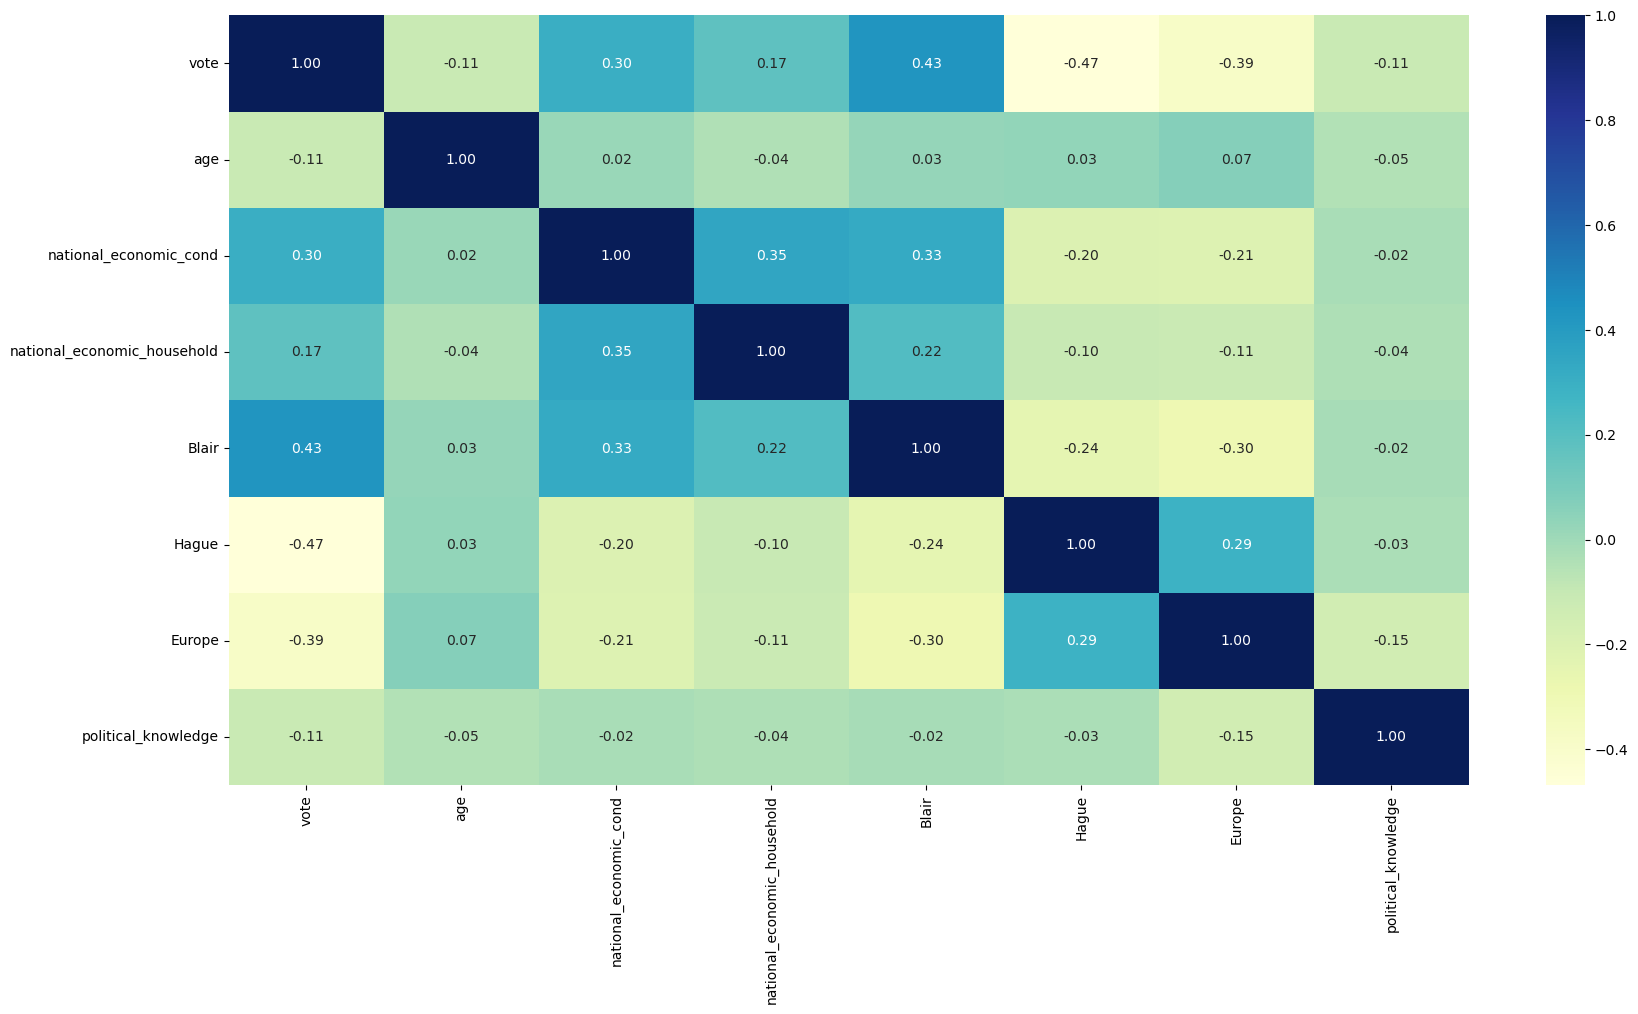

In [17]:
plt.figure(figsize  = (20,10))
sns.heatmap(data_df_num.corr(), annot = True, cmap="YlGnBu", fmt='.2f')
plt.show()

From the visualization:
 1) national_economic_cond and national_economic_housegold are postively correlated and vicer versa.
 2) Blair and Europe are negatively correlated.


## Outlier treatment

In [18]:
#Boxplot technique to treat outliers
def remove_outliers(col):
    Q1,Q3=np.percentile(col,[25,75])
    IQR = Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

lower range -1.5 and upper range 2.5


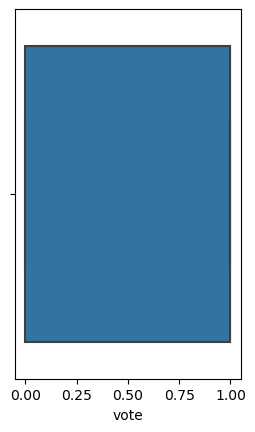

lower range 2.0 and upper range 106.0


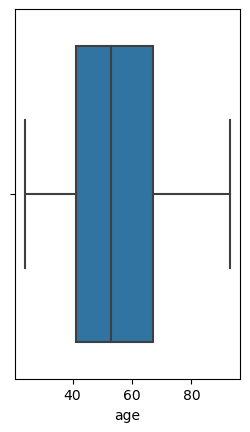

lower range 1.5 and upper range 5.5


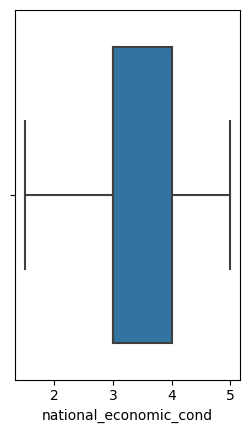

lower range 1.5 and upper range 5.5


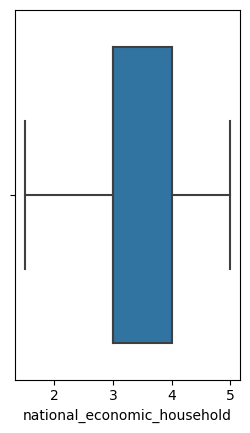

lower range -1.0 and upper range 7.0


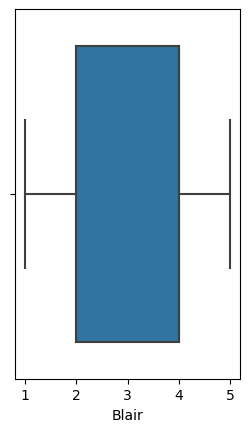

lower range -1.0 and upper range 7.0


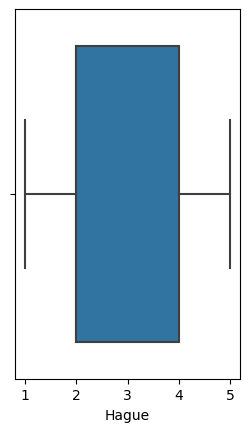

lower range -5.0 and upper range 19.0


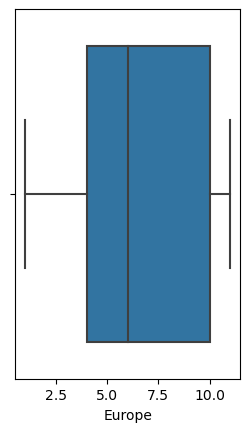

lower range -3.0 and upper range 5.0


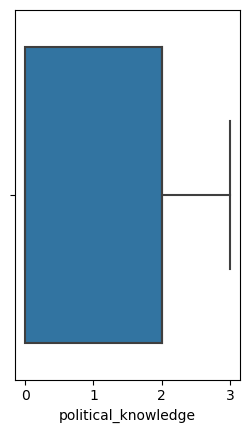

In [19]:
for col in data_df_num[1:]:
    lr, ur = remove_outliers(data_df_num[col])
    print("lower range",lr, "and upper range", ur)
    data_df_num[col] = np.where(data_df_num[col]> ur,ur,data_df_num[col])
    data_df_num[col] = np.where(data_df_num[col]<lr,lr,data_df_num[col])
    plt.subplot(1,2,1)
    sns.boxplot(x=data_df_num[col])
    plt.show()

After the box plot technique of outlier treatment, the outliers are removed. It uses a technique of lower index and upper index for eliminating the outliers.

## Univariant analysis for Categorical variable

gender


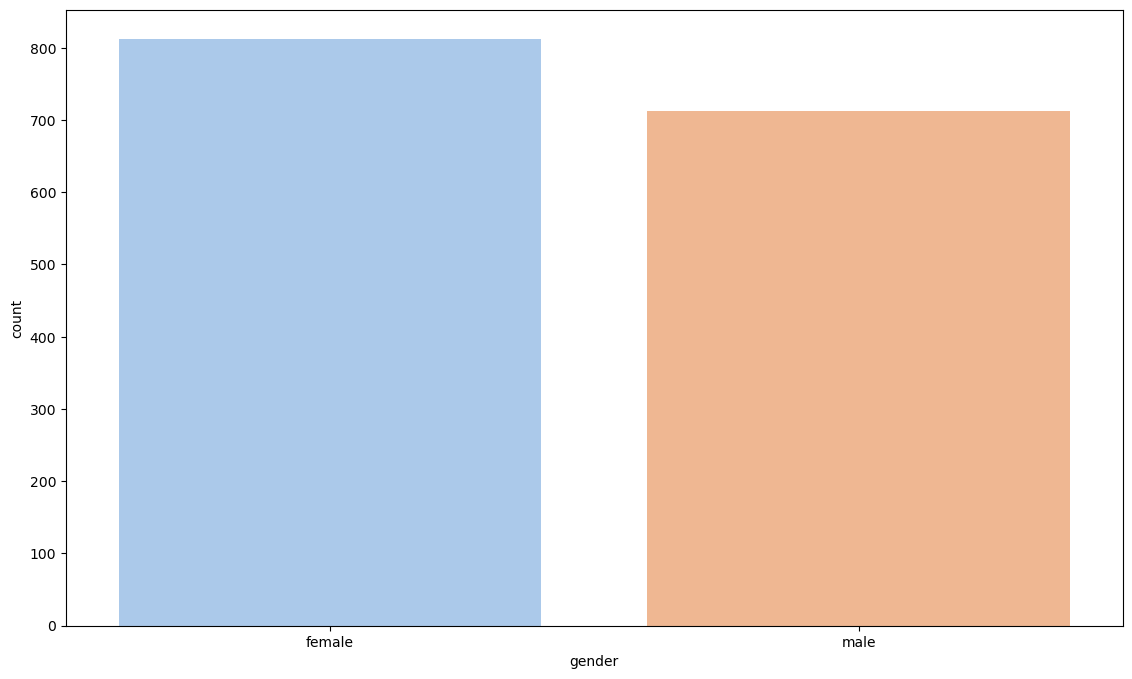

In [20]:
for col in data_df_cat[1:]:
    print(col)
    plt.figure(figsize=(30,8))
    plt.subplot(1,2,1)
    sns.countplot(x=data_df_cat[col],  palette='pastel')
    plt.show()

### Observations:
1) The Female population is more as compared to male.

### For checking if there are any ? instead of missing values.

In [21]:
for variable in data_df_cat:
    print(variable,":", sum(data_df_cat[variable] == '?'))

gender : 0


## Bivariant analysis

In [22]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   vote                         1525 non-null   int64 
 1   age                          1525 non-null   int64 
 2   national_economic_cond       1525 non-null   int64 
 3   national_economic_household  1525 non-null   int64 
 4   Blair                        1525 non-null   int64 
 5   Hague                        1525 non-null   int64 
 6   Europe                       1525 non-null   int64 
 7   political_knowledge          1525 non-null   int64 
 8   gender                       1525 non-null   object
dtypes: int64(8), object(1)
memory usage: 107.4+ KB


<Axes: xlabel='vote', ylabel='age'>

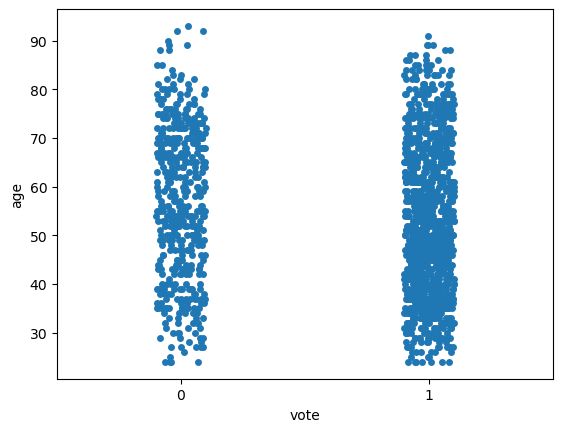

In [23]:
sns.stripplot(data=data_df, x='vote', y='age')

Observations:
1) Different age group people are present. The graph depicts that most of the younger and middle age vote for Labour leader.

<Axes: xlabel='vote', ylabel='national_economic_cond'>

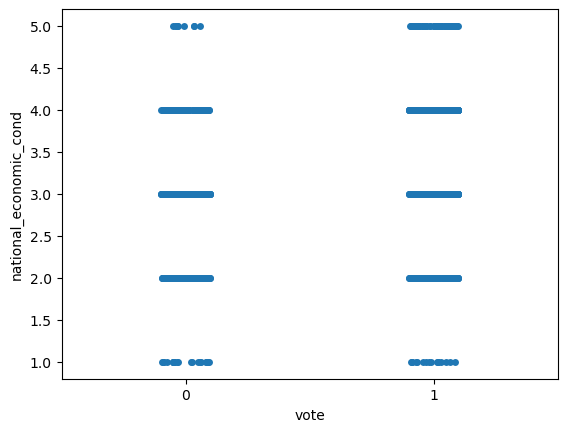

In [24]:
sns.stripplot(data=data_df, x='vote', y='national_economic_cond')

Observation:
1) The economic national conditional looks almost smae for both the parties. At top 5 the Labour party leader looks good.

<Axes: xlabel='vote', ylabel='national_economic_household'>

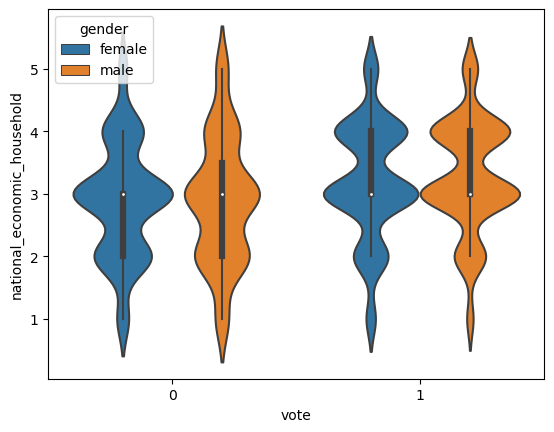

In [25]:
sns.violinplot(x ='vote', y='national_economic_household', data= data_df, hue='gender')

Observation:
1) econmic household of the nation looks equally distributed. The Median is around 3. 

<Axes: xlabel='vote', ylabel='Hague'>

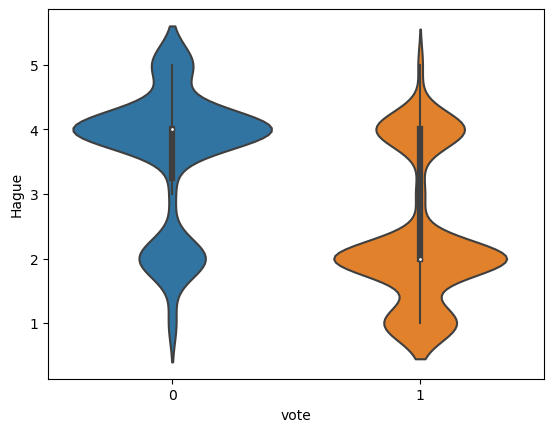

In [26]:
sns.violinplot(x ='vote', y='Hague', data= data_df)

Observation:
1) The conservative leader has median around 4 and for labour its around 2 that means more positive votes for Hague from conservative party.

<Axes: xlabel='vote', ylabel='Blair'>

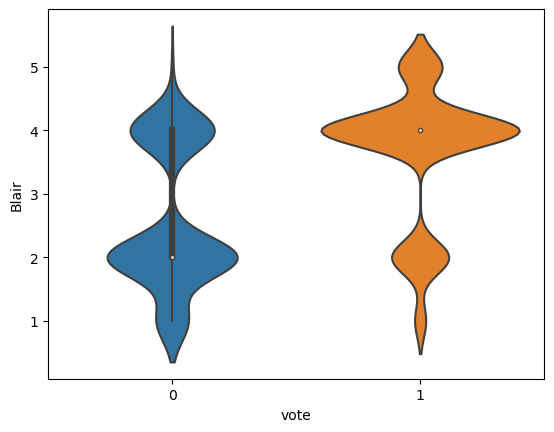

In [27]:
sns.violinplot(x ='vote', y='Blair', data= data_df)

Observations:
1) The conservative leader is having median around 2 and violin plot looks close to normal. But labour leader is not equally distributed. the number of people opting Labour is more than other.

<Axes: xlabel='vote', ylabel='political_knowledge'>

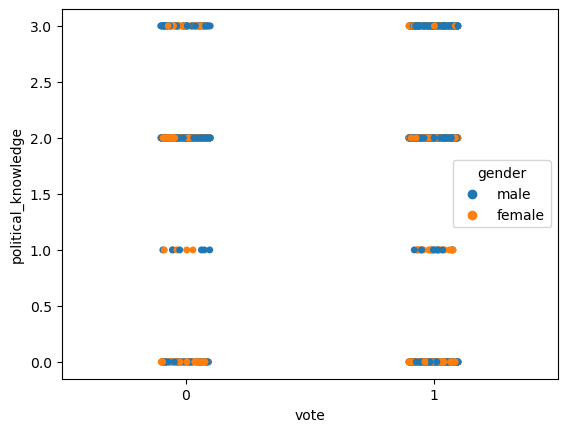

In [28]:
sns.stripplot(data=data_df, x='vote', y='political_knowledge', hue='gender')

Observation:
1) The women have least knowledge on the politics.Knowing about the politics and then voting looks like labour leader party has majority.

<Axes: xlabel='vote', ylabel='Europe'>

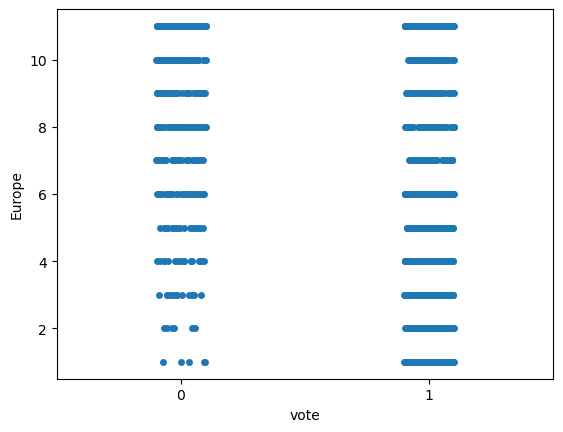

In [29]:
sns.stripplot(x=data_df['vote'], y=data_df['Europe'], jitter=True)

Obseravtion:
1) Conservative party is bit unstable compared to Labour leader party. The majority of votes are or Labour leader.

<Axes: xlabel='gender', ylabel='count'>

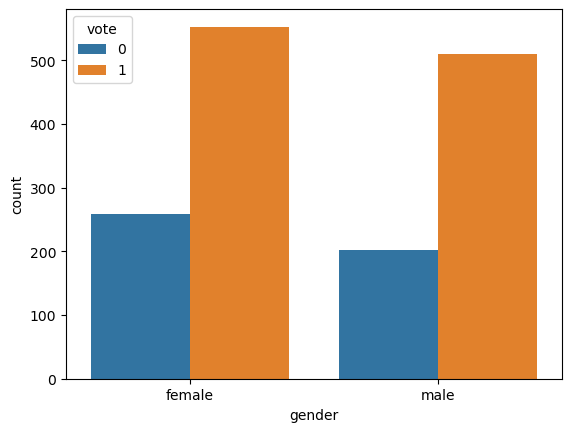

In [30]:
sns.countplot(data=data_df, x='gender', hue='vote')

<Axes: xlabel='Blair', ylabel='count'>

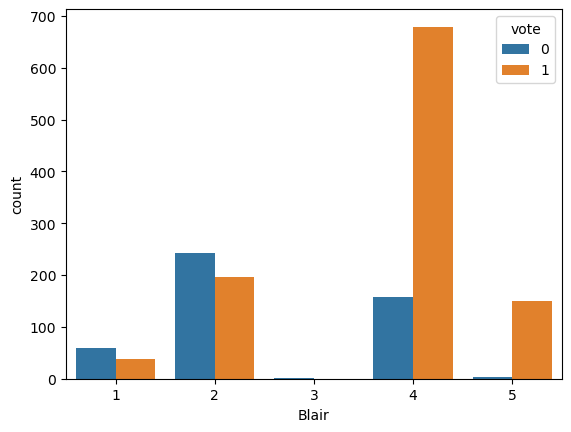

In [31]:
sns.countplot(data=data_df, x='Blair', hue='vote')

<Axes: xlabel='vote', ylabel='gender'>

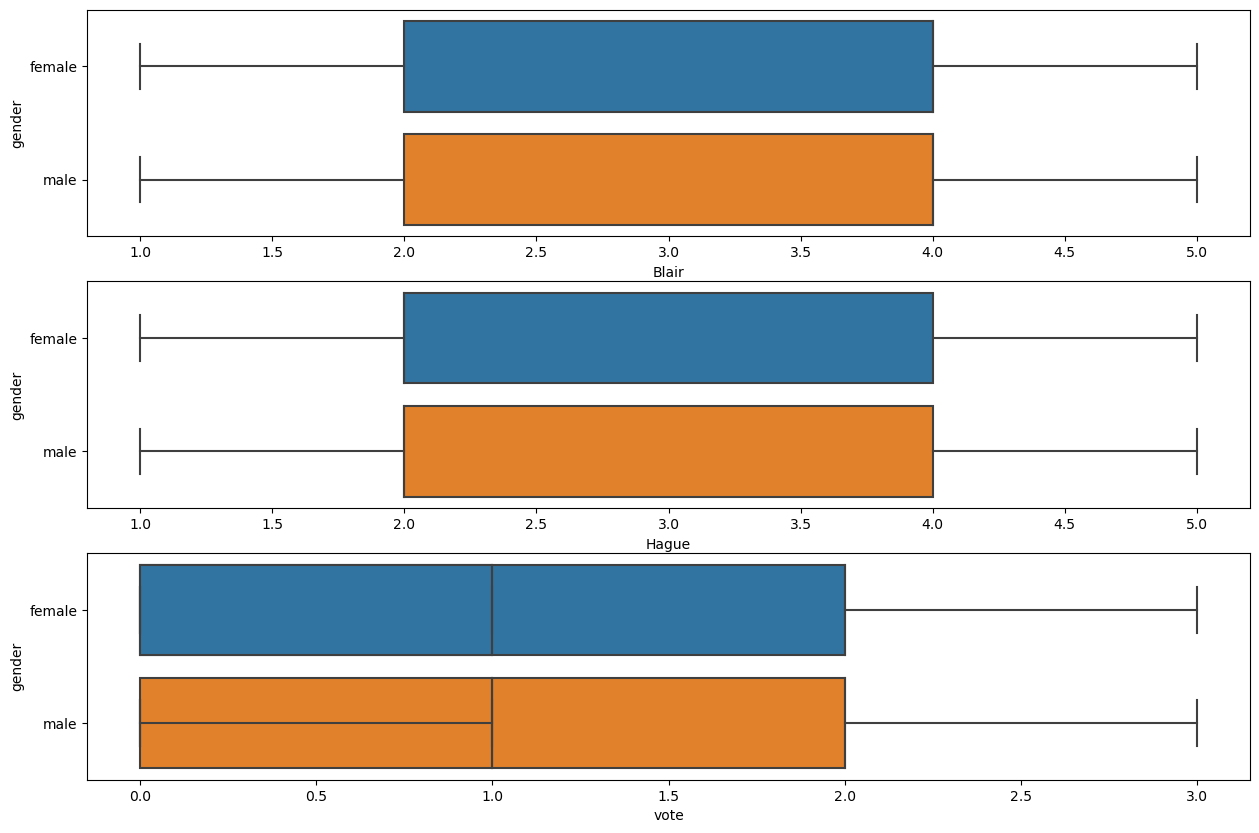

In [32]:
# categorical vs numerical
fig, axes = plt.subplots(nrows=3, ncols=1)
fig.set_size_inches(15,10)
sns.boxplot(data=data_df, x='Blair', y='gender', ax=axes[0])
sns.boxplot(data=data_df, x='Hague', y='gender', ax=axes[1])
sns.boxplot(data=data_df, x='political_knowledge', y='gender', ax=axes[2])
sns.boxplot(data=data_df, x='vote', y='gender', ax=axes[2])

## Multivraint analysis

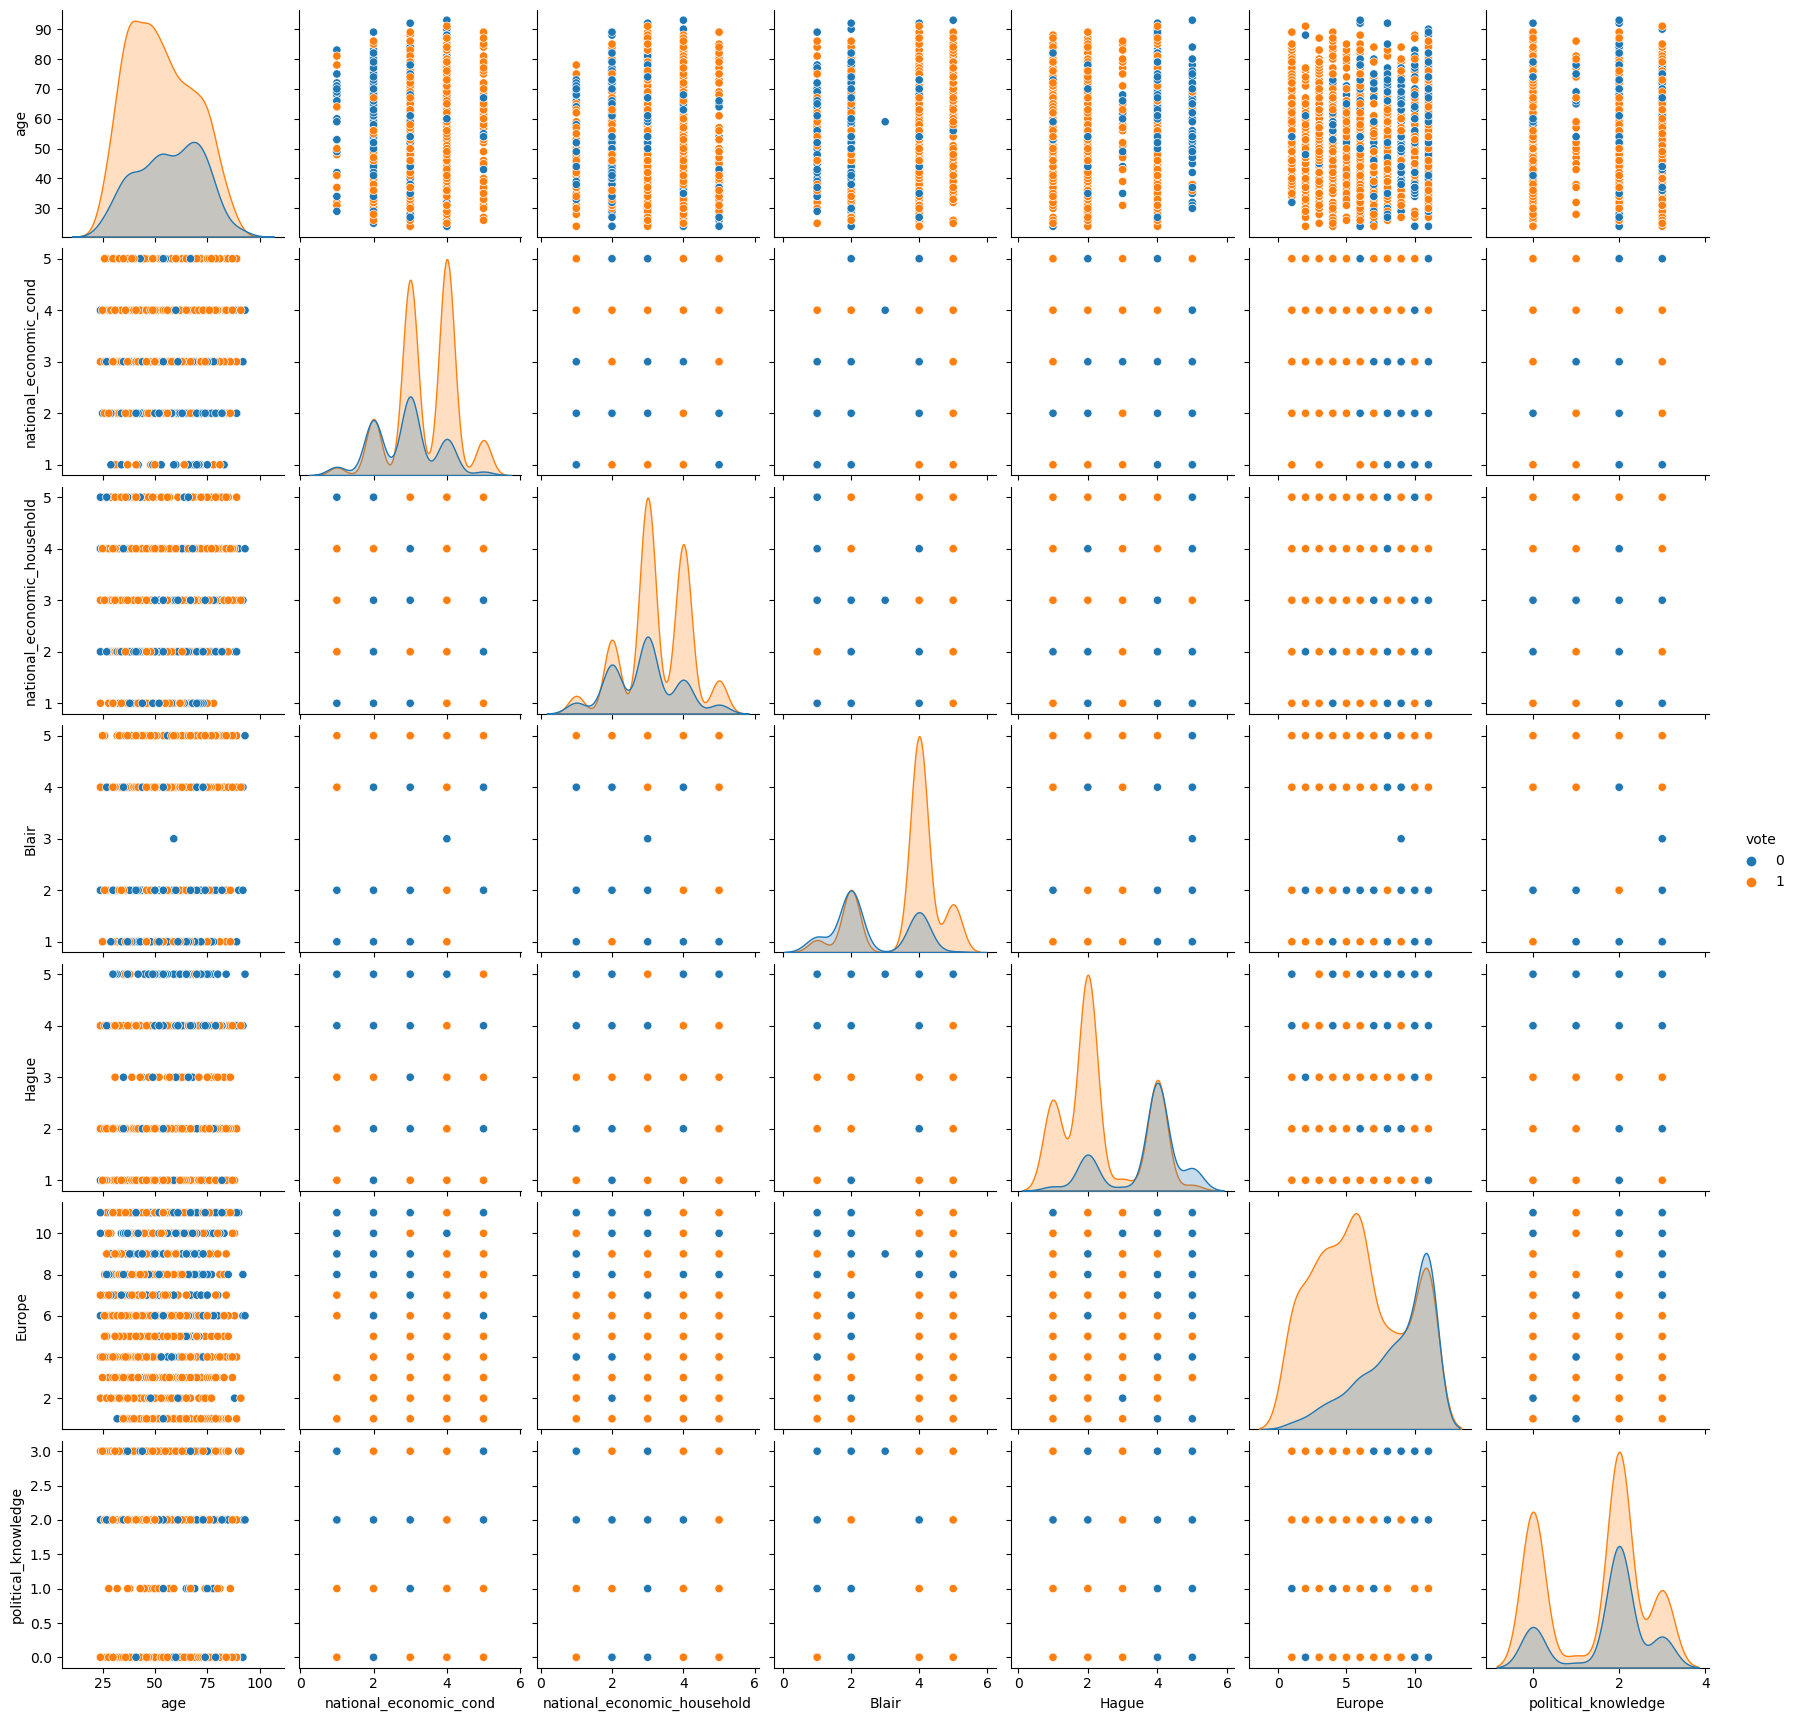

In [33]:
sns.pairplot(data=data_df,hue="vote")

## get_dummies of the object variables

In [34]:
cat = ['gender']

In [35]:
df =pd.get_dummies(data_df, columns=cat, drop_first=True)
df.shape

(1525, 9)

In [36]:
df.head()

,vote,age,national_economic_cond,national_economic_household,Blair,Hague,Europe,political_knowledge,gender_male
0,1,43,3,3,4,1,2,2,0
1,1,36,4,4,4,4,5,2,1
2,1,35,4,4,5,2,3,2,1
3,1,24,4,2,2,1,4,0,0
4,1,41,2,2,1,1,6,2,1


### Train-Test Split Split X and y into training and test set in 70:30 ratio with random_state=1

In [37]:
# Arrange data into independent variables and dependent variables
X = df.drop("vote",axis=1)  ## Features
y = df["vote"]  ## Target

In [38]:
df['vote'].value_counts()

1    1063
0     462
Name: vote, dtype: int64

In [39]:
X_train, X_test, y_train,y_test = train_test_split(X, y, test_size=0.30, random_state=1)

## Naive Bayes

In [40]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay

In [41]:
NB_model = GaussianNB()
# fit the model
NB_model.fit(X_train,y_train)

GaussianNB()

## Performance Matrix on train data set

0.8331771321462043
[[240  92]
 [ 86 649]]
              precision    recall  f1-score   support

           0       0.74      0.72      0.73       332
           1       0.88      0.88      0.88       735

    accuracy                           0.83      1067
   macro avg       0.81      0.80      0.80      1067
weighted avg       0.83      0.83      0.83      1067



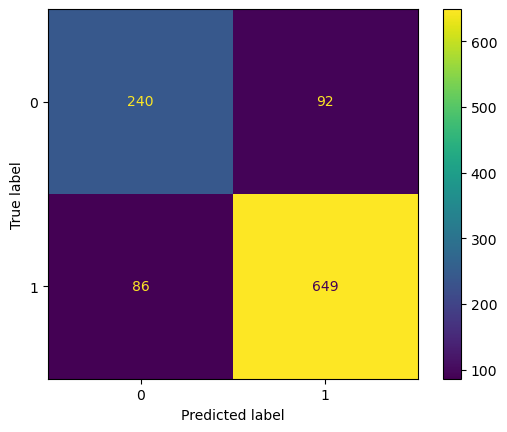

In [42]:
y_train_predict = NB_model.predict(X_train)
model_score = NB_model.score(X_train, y_train)                      ## Accuracy
cm = metrics.confusion_matrix(y_train, y_train_predict)
print(model_score)
print(cm)          ## confusion_matrix
print(metrics.classification_report(y_train, y_train_predict))    ## classification_report
dis = ConfusionMatrixDisplay(cm)
dis.plot()

### ROC AND AUC curve

AUC: 0.886


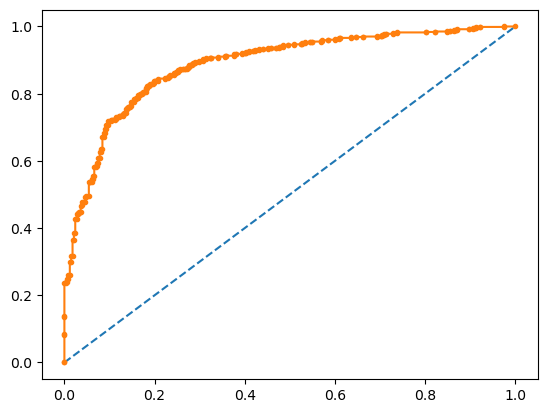

In [43]:
# predict probabilities
probs = NB_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

## Performance Matrix on test data set

0.8253275109170306
[[240  92]
 [ 86 649]]
              precision    recall  f1-score   support

           0       0.68      0.72      0.70       130
           1       0.89      0.87      0.88       328

    accuracy                           0.83       458
   macro avg       0.78      0.79      0.79       458
weighted avg       0.83      0.83      0.83       458



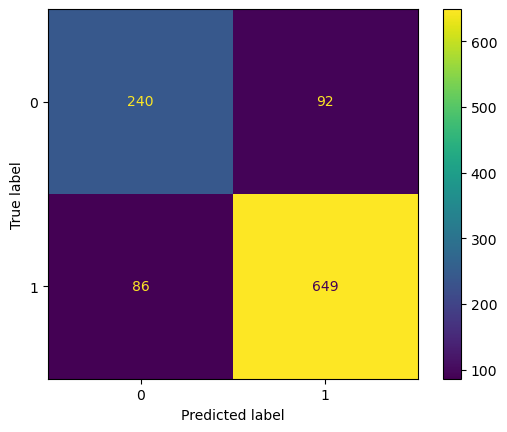

In [44]:
## Performance Matrix on test data set
y_test_predict = NB_model.predict(X_test)
model_score = NB_model.score(X_test, y_test)                      ## Accuracy
cm = metrics.confusion_matrix(y_train, y_train_predict)
print(model_score)
print(cm)          ## confusion_matrix
print(metrics.classification_report(y_test, y_test_predict))     ## classification_report
dis = ConfusionMatrixDisplay(cm)
dis.plot()

### ROC AND AUC curve

AUC: 0.885


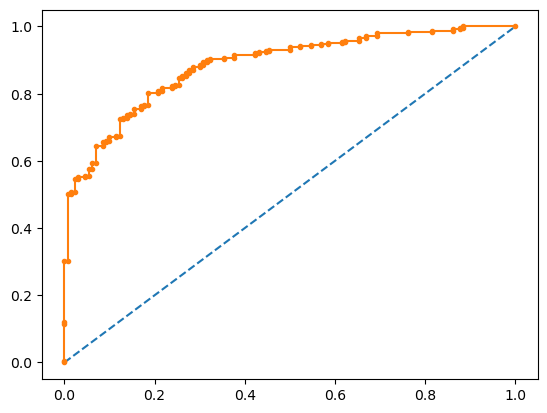

In [45]:
# predict probabilities
probs = NB_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, probs,  pos_label=1)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

### Actionable Insights:

1) The model has accuracy of 83%. Which is good fit for classification.
2) The model is having pretty high for recall around 87%, which means its able to rectify the actual true positives.  The type II error is very minimal.
3) The precision is 0.89 for the class of interest. Again, the type I error is minimal.




## KNN Model

#### Apply Z score on the features.

In [46]:
df_zscore = data_df_num.apply(zscore)
df_zscore.describe()

,vote,age,national_economic_cond,national_economic_household,Blair,Hague,Europe,political_knowledge
count,1.525000e+03,1.525000e+03,1.525000e+03,1.525000e+03,1.525000e+03,1.525000e+03,1.525000e+03,1.525000e+03
mean,-1.025045e-16,1.013397e-16,8.386734e-17,-1.258010e-16,1.677347e-16,1.164824e-17,-1.327900e-16,-8.153769e-17
std,1.000328e+00,1.000328e+00,1.000328e+00,1.000328e+00,1.000328e+00,1.000328e+00,1.000328e+00,1.000328e+00
min,-1.516861e+00,-1.921698e+00,-2.061826e+00,-1.877568e+00,-1.987695e+00,-1.419886e+00,-1.737782e+00,-1.424148e+00
25%,-1.516861e+00,-8.393129e-01,-3.026217e-01,-1.826443e-01,-1.136225e+00,-6.070758e-01,-8.277143e-01,-1.424148e+00
50%,6.592564e-01,-7.527638e-02,-3.026217e-01,-1.826443e-01,5.667164e-01,-6.070758e-01,-2.210023e-01,4.226427e-01
75%,6.592564e-01,8.160995e-01,8.701815e-01,9.473050e-01,5.667164e-01,1.018544e+00,9.924217e-01,4.226427e-01
max,6.592564e-01,2.471512e+00,2.042985e+00,2.077254e+00,1.418187e+00,1.831354e+00,1.295778e+00,1.346038e+00


In [47]:
from sklearn.neighbors import KNeighborsClassifier
KNN_model = KNeighborsClassifier(n_neighbors = 5)
KNN_model.fit(X_train, y_train)

KNeighborsClassifier()

## Performance Matrix on train data set

0.8612933458294283
[[246  86]
 [ 62 673]]
              precision    recall  f1-score   support

           0       0.80      0.74      0.77       332
           1       0.89      0.92      0.90       735

    accuracy                           0.86      1067
   macro avg       0.84      0.83      0.83      1067
weighted avg       0.86      0.86      0.86      1067



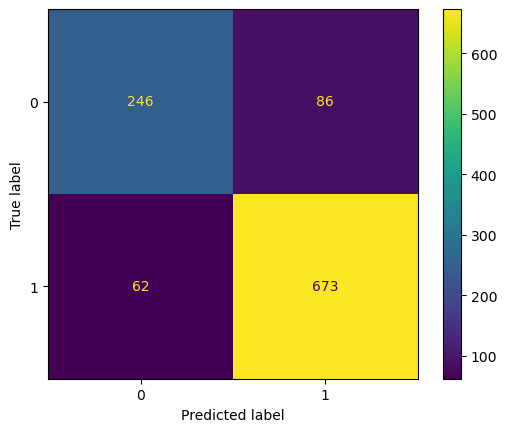

In [48]:
y_train_predict = KNN_model.predict(X_train)
model_score = KNN_model.score(X_train, y_train)
cm = metrics.confusion_matrix(y_train, y_train_predict)
print(model_score)
print(cm)
print(metrics.classification_report(y_train, y_train_predict))
dis = ConfusionMatrixDisplay(cm)
dis.plot()

AUC: 0.924


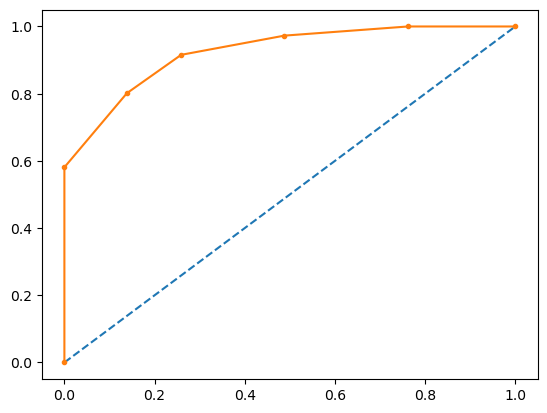

In [49]:
# predict probabilities
probs = KNN_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

## Performance Matrix on test data set

0.7860262008733624
[[ 81  49]
 [ 49 279]]
              precision    recall  f1-score   support

           0       0.62      0.62      0.62       130
           1       0.85      0.85      0.85       328

    accuracy                           0.79       458
   macro avg       0.74      0.74      0.74       458
weighted avg       0.79      0.79      0.79       458



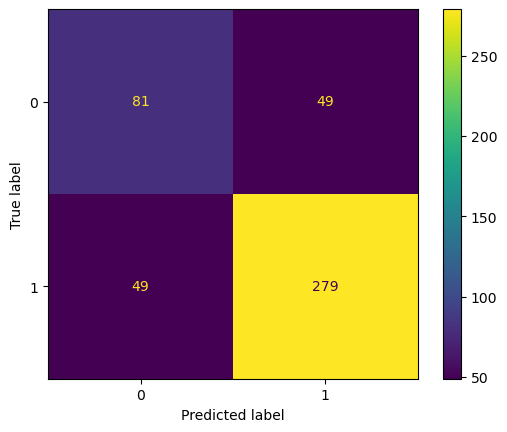

In [50]:
y_test_predict = KNN_model.predict(X_test)
model_score = KNN_model.score(X_test, y_test)                      ## Accuracy
cm = metrics.confusion_matrix(y_test, y_test_predict)
print(model_score)
print(cm)          ## confusion_matrix
print(metrics.classification_report(y_test, y_test_predict))     ## classification_report
dis = ConfusionMatrixDisplay(cm)
dis.plot()

AUC: 0.832


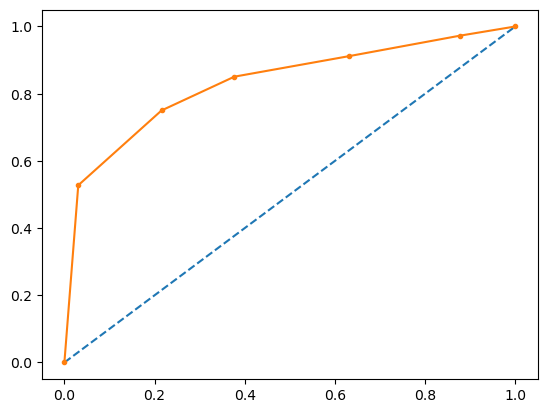

In [51]:
# predict probabilities
probs = KNN_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, probs,  pos_label=1)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

### The difference is more between train and test data so will find next best K value.

In [52]:
# empty list that will hold accuracy scores
ac_scores = []

# perform accuracy metrics for values from 1,3,5....19
for k in range(1,20,2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    # evaluate test accuracy
    scores = knn.score(X_test, y_test)
    ac_scores.append(scores)

# changing to misclassification error
MCE = [1 - x for x in ac_scores]
MCE


[0.2620087336244541,
 0.222707423580786,
 0.2139737991266376,
 0.20305676855895194,
 0.20305676855895194,
 0.20524017467248912,
 0.19213973799126638,
 0.18777292576419213,
 0.1834061135371179,
 0.1899563318777293]

### Plot misclassification error vs k (with k value on X-axis) using matplotli

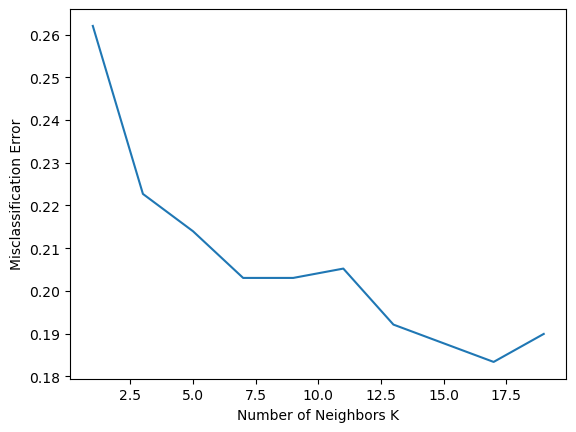

In [53]:
import matplotlib.pyplot as plt
# plot misclassification error vs k
plt.plot(range(1,20,2), MCE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

In [54]:
from sklearn.neighbors import KNeighborsClassifier

KNN_model=KNeighborsClassifier(n_neighbors=15)
# fit the model
KNN_model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=15)

0.8266166822867854
[[212 120]
 [ 65 670]]
              precision    recall  f1-score   support

           0       0.77      0.64      0.70       332
           1       0.85      0.91      0.88       735

    accuracy                           0.83      1067
   macro avg       0.81      0.78      0.79      1067
weighted avg       0.82      0.83      0.82      1067



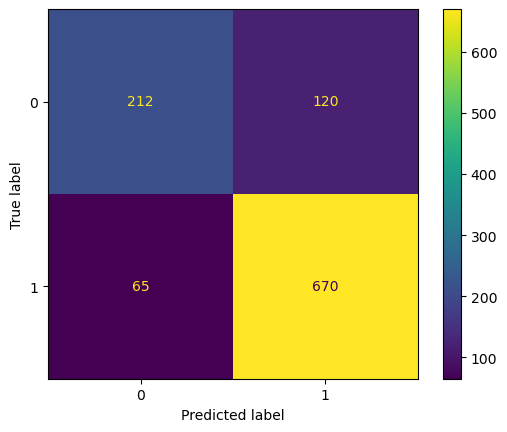

In [55]:
## Performance Matrix on train data set
y_train_predict = KNN_model.predict(X_train)
model_score = KNN_model.score(X_train, y_train)
cm = metrics.confusion_matrix(y_train, y_train_predict)
print(model_score)
print(cm)
print(metrics.classification_report(y_train, y_train_predict))
dis = ConfusionMatrixDisplay(cm)
dis.plot()

AUC: 0.894


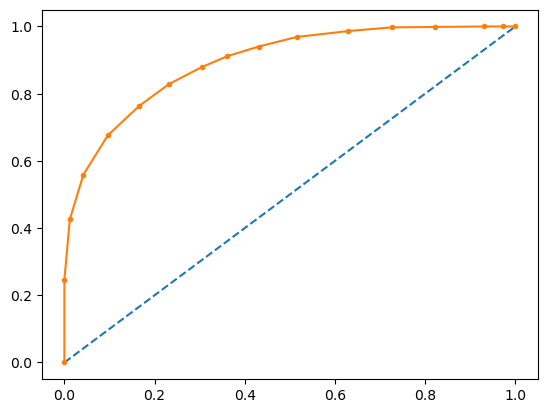

In [56]:
# predict probabilities
probs = KNN_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

0.8122270742358079
[[ 84  46]
 [ 40 288]]
              precision    recall  f1-score   support

           0       0.68      0.65      0.66       130
           1       0.86      0.88      0.87       328

    accuracy                           0.81       458
   macro avg       0.77      0.76      0.77       458
weighted avg       0.81      0.81      0.81       458



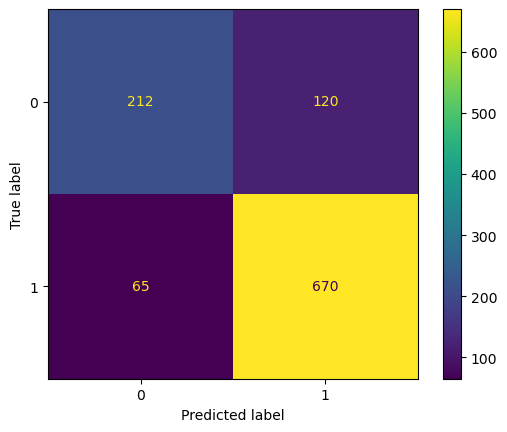

In [57]:
## Performance Matrix on test data set
y_test_predict = KNN_model.predict(X_test)
model_score = KNN_model.score(X_test, y_test)                      ## Accuracy
cm = metrics.confusion_matrix(y_train, y_train_predict)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))          ## confusion_matrix
print(metrics.classification_report(y_test, y_test_predict))     ## classification_report
dis = ConfusionMatrixDisplay(cm)
dis.plot()

AUC: 0.869


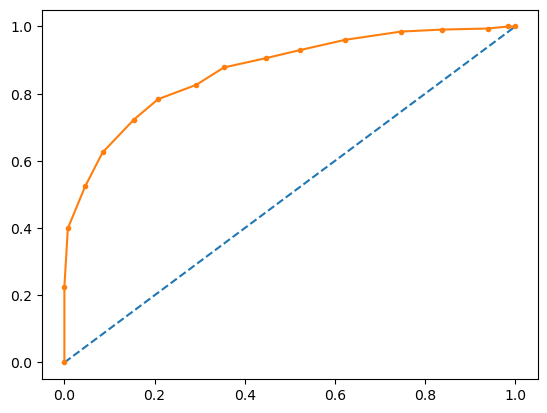

In [58]:
# predict probabilities
probs = KNN_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, probs,  pos_label=1)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

### As the difference between train and test accuracies is less, it is a valid model. With K=15 the model is stable.

### Actionable Insights:

1) The model has accuracy of 81%. Which is good fit for classification.
2) The model is having pretty high for recall around 88%, which means its able to rectify the actual true positives.  The type II error is very minimal.
3) The precision is 0.86 for the class of interest. Again, the type I error is minimal.
4) The model predicts good win for Labour leader.


## Bagging

In [59]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
cart = DecisionTreeClassifier(criterion = 'gini', random_state=1)
Bagging_model=BaggingClassifier(base_estimator=cart,n_estimators=100,random_state=1)
Bagging_model.fit(X_train, y_train)

C:\Users\subra\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=1),
                  n_estimators=100, random_state=1)

0.9990627928772259
[[331   1]
 [  0 735]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       332
           1       1.00      1.00      1.00       735

    accuracy                           1.00      1067
   macro avg       1.00      1.00      1.00      1067
weighted avg       1.00      1.00      1.00      1067



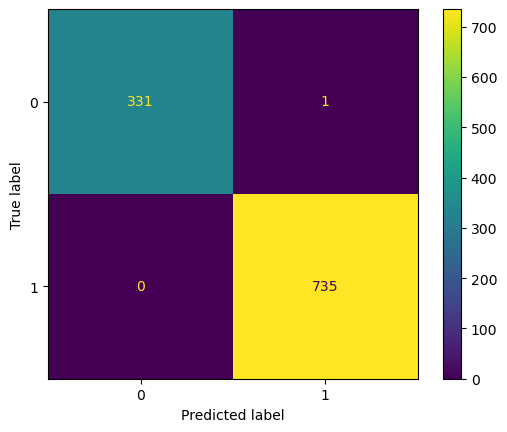

In [60]:
## Performance Matrix on train data set
y_train_predict = Bagging_model.predict(X_train)
model_score = Bagging_model.score(X_train, y_train)
cm = metrics.confusion_matrix(y_train, y_train_predict)
print(model_score)
print(cm)
print(metrics.classification_report(y_train, y_train_predict))
dis = ConfusionMatrixDisplay(cm)
dis.plot()

AUC: 1.000


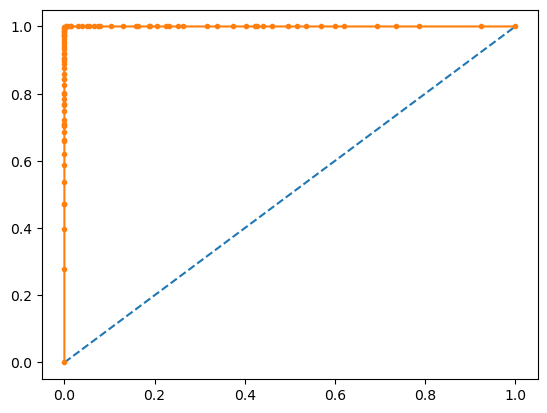

In [61]:
# predict probabilities
probs = Bagging_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

0.7969432314410481
[[ 83  47]
 [ 46 282]]
              precision    recall  f1-score   support

           0       0.64      0.64      0.64       130
           1       0.86      0.86      0.86       328

    accuracy                           0.80       458
   macro avg       0.75      0.75      0.75       458
weighted avg       0.80      0.80      0.80       458



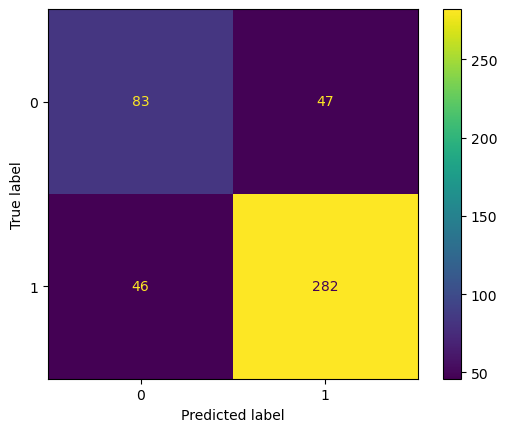

In [62]:
y_test_predict = Bagging_model.predict(X_test)
model_score = Bagging_model.score(X_test, y_test)                      ## Accuracy
cm = metrics.confusion_matrix(y_test, y_test_predict)
print(model_score)
print(cm)          ## confusion_matrix
print(metrics.classification_report(y_test, y_test_predict))     ## classification_report
dis = ConfusionMatrixDisplay(cm)
dis.plot()

AUC: 0.877


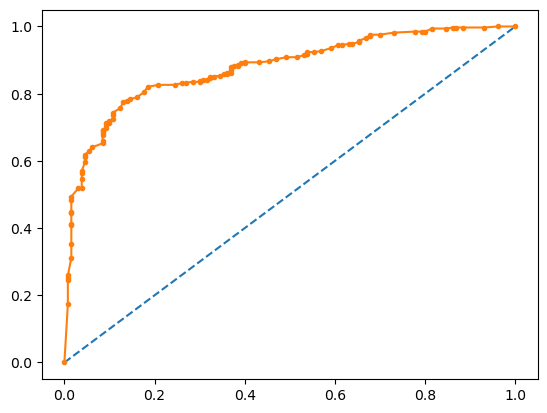

In [63]:
# predict probabilities
probs = Bagging_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, probs,  pos_label=1)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

### Actionable Insights and recommendation:

1) The model has accuracy of 80%.
2) The model is having pretty high for recall around 86%, which means its able to rectify the actual true positives.  The type II error is very minimal.
3) The precision is 0.86 for the class of interest. Again, the type I error is minimal.
4) Still the model can be fine tuned since difference in train and test performance.




## Ada Boosting

In [64]:
from sklearn.ensemble import AdaBoostClassifier
ADB_model = AdaBoostClassifier(n_estimators=100,random_state=1)
ADB_model.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=100, random_state=1)

0.8472352389878163
[[238  94]
 [ 69 666]]
              precision    recall  f1-score   support

           0       0.78      0.72      0.74       332
           1       0.88      0.91      0.89       735

    accuracy                           0.85      1067
   macro avg       0.83      0.81      0.82      1067
weighted avg       0.84      0.85      0.85      1067



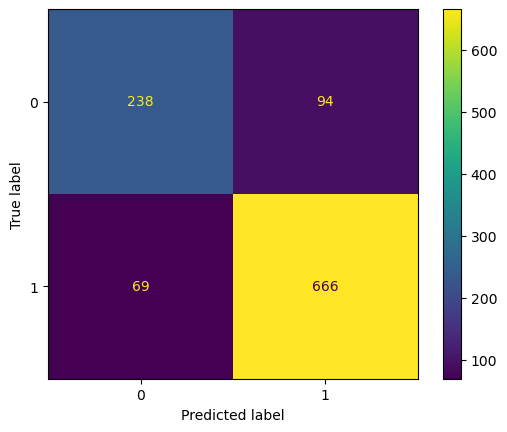

In [65]:
## Performance Matrix on train data set
y_train_predict = ADB_model.predict(X_train)
model_score = ADB_model.score(X_train, y_train)
cm = metrics.confusion_matrix(y_train, y_train_predict)
print(model_score)
print(cm)
print(metrics.classification_report(y_train, y_train_predict))
dis = ConfusionMatrixDisplay(cm)
dis.plot()

AUC: 0.913


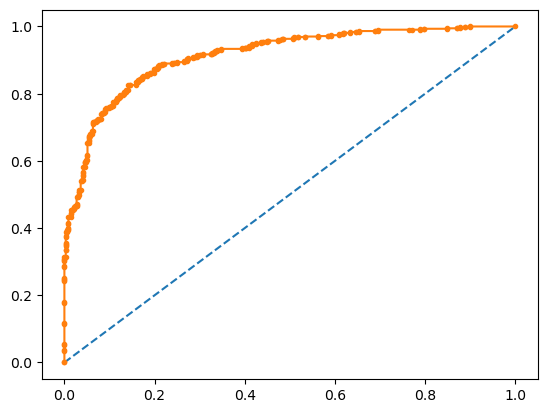

In [66]:
# predict probabilities
probs = ADB_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

0.8187772925764192
[[ 90  40]
 [ 43 285]]
              precision    recall  f1-score   support

           0       0.68      0.69      0.68       130
           1       0.88      0.87      0.87       328

    accuracy                           0.82       458
   macro avg       0.78      0.78      0.78       458
weighted avg       0.82      0.82      0.82       458



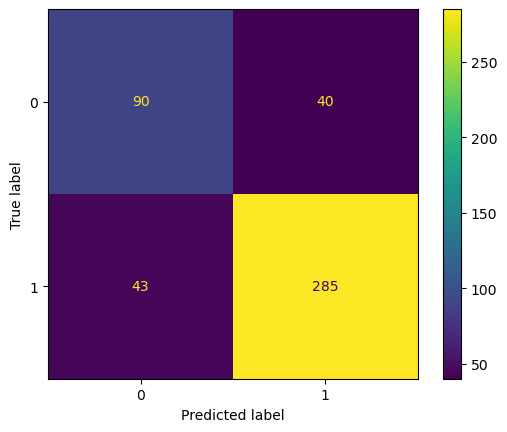

In [67]:
## Performance Matrix on test data set
y_test_predict = ADB_model.predict(X_test)
model_score = ADB_model.score(X_test, y_test)
cm = metrics.confusion_matrix(y_test, y_test_predict)
print(model_score)
print(cm)
print(metrics.classification_report(y_test, y_test_predict))
dis = ConfusionMatrixDisplay(cm)
dis.plot()

AUC: 0.879


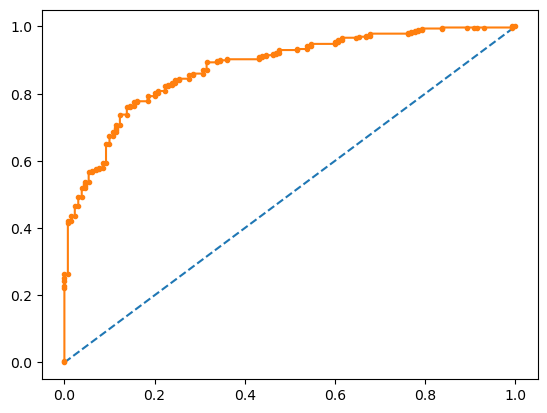

In [68]:
# predict probabilities
probs = ADB_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, probs,  pos_label=1)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

## Gradient boosting

In [69]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(random_state=1)
gbcl = gbcl.fit(X_train, y_train)

0.8865979381443299
[[262  70]
 [ 51 684]]
              precision    recall  f1-score   support

           0       0.84      0.79      0.81       332
           1       0.91      0.93      0.92       735

    accuracy                           0.89      1067
   macro avg       0.87      0.86      0.87      1067
weighted avg       0.89      0.89      0.89      1067



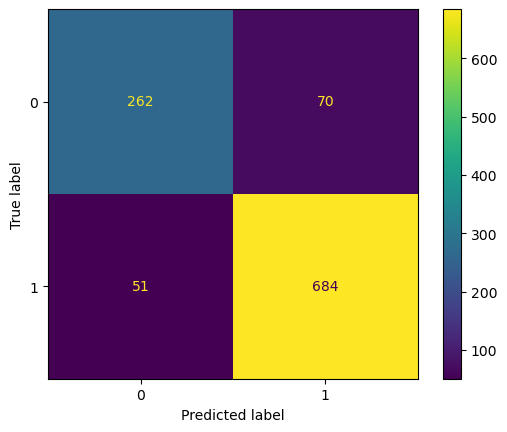

In [70]:
## Performance Matrix on train data set
y_train_predict = gbcl.predict(X_train)
model_score = gbcl.score(X_train, y_train)
cm = metrics.confusion_matrix(y_train, y_train_predict)
print(model_score)
print(cm)
print(metrics.classification_report(y_train, y_train_predict))
dis = ConfusionMatrixDisplay(cm)
dis.plot()

AUC: 0.950


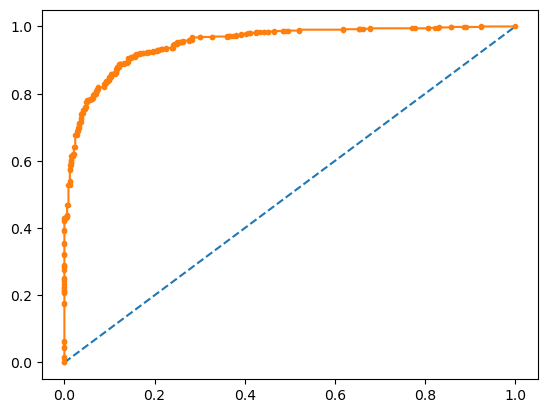

In [71]:
# predict probabilities
probs = gbcl.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

0.8318777292576419
[[ 96  34]
 [ 43 285]]
              precision    recall  f1-score   support

           0       0.69      0.74      0.71       130
           1       0.89      0.87      0.88       328

    accuracy                           0.83       458
   macro avg       0.79      0.80      0.80       458
weighted avg       0.84      0.83      0.83       458



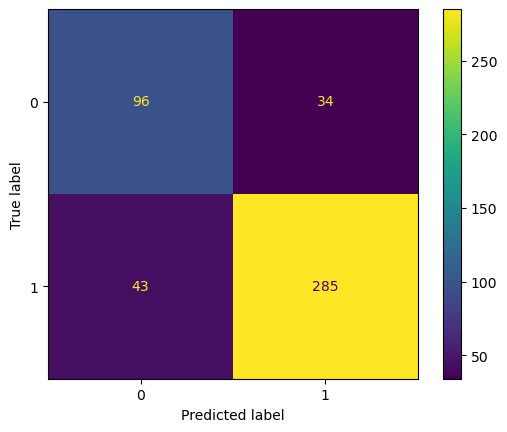

In [72]:
## Performance Matrix on test data set
y_test_predict = gbcl.predict(X_test)
model_score = gbcl.score(X_test, y_test)
cm = metrics.confusion_matrix(y_test, y_test_predict)
print(model_score)
print(cm)
print(metrics.classification_report(y_test, y_test_predict))
dis = ConfusionMatrixDisplay(cm)
dis.plot()

AUC: 0.904


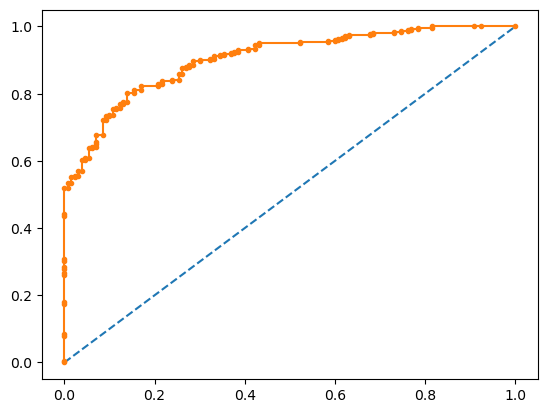

In [73]:
# predict probabilities
probs = gbcl.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, probs,  pos_label=1)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

### Actionable Insights and recommendation:

1) The model has accuracy of 82% and 83%. Which is good fit for classification.
2) The model is having pretty high for recall %, which means its able to rectify the actual true positives.  The type II error is very minimal.
3) The precision for the class of interest is high. Again, the type I error is minimal.
4) The Gradient and Ada boosting can be give little better performance after tuning.



## Random Forest

In [74]:

from sklearn.ensemble import RandomForestClassifier

RF_model=RandomForestClassifier(n_estimators=100,random_state=1)
RF_model.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

In [75]:
## Performance Matrix on train data set
y_train_predict = RF_model.predict(X_train)
model_score = RF_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.9990627928772259
[[331   1]
 [  0 735]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       332
           1       1.00      1.00      1.00       735

    accuracy                           1.00      1067
   macro avg       1.00      1.00      1.00      1067
weighted avg       1.00      1.00      1.00      1067



In [76]:
## Performance Matrix on test data set
y_test_predict = RF_model.predict(X_test)
model_score = RF_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8209606986899564
[[ 90  40]
 [ 42 286]]
              precision    recall  f1-score   support

           0       0.68      0.69      0.69       130
           1       0.88      0.87      0.87       328

    accuracy                           0.82       458
   macro avg       0.78      0.78      0.78       458
weighted avg       0.82      0.82      0.82       458



## SMOTE for Bagging and Boosting

In [77]:
from numpy import where
import matplotlib.pyplot as plt

from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE

In [78]:
sm = SMOTE(random_state=1)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

In [79]:
## Let's check the shape after SMOTE
X_train_res.shape

(1470, 8)

In [80]:
counter=Counter(X_train_res)
counter

Counter({'age': 1,
         'national_economic_cond': 1,
         'national_economic_household': 1,
         'Blair': 1,
         'Hague': 1,
         'Europe': 1,
         'political_knowledge': 1,
         'gender_male': 1})

In [81]:
counter=Counter(y_train_res)
counter

Counter({1: 735, 0: 735})

### Bagging with SMOTE

In [82]:
cart = DecisionTreeClassifier(criterion = 'gini',random_state=1, max_depth=5, min_samples_split =3, min_samples_leaf= 2)
Bag_model=BaggingClassifier(base_estimator=cart,n_estimators=100,random_state=1)
Bag_model = Bag_model.fit(X_train_res, y_train_res)

C:\Users\subra\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


0.8802721088435375
[[663  72]
 [104 631]]
              precision    recall  f1-score   support

           0       0.86      0.90      0.88       735
           1       0.90      0.86      0.88       735

    accuracy                           0.88      1470
   macro avg       0.88      0.88      0.88      1470
weighted avg       0.88      0.88      0.88      1470



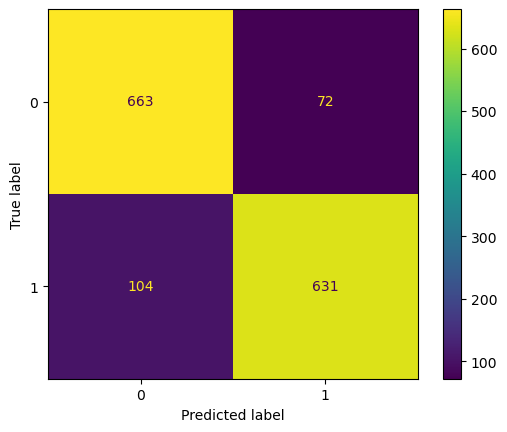

In [83]:
## Performance Matrix on train data set
y_train_predict = Bag_model.predict(X_train_res)
model_score = Bag_model.score(X_train_res, y_train_res)
cm = metrics.confusion_matrix(y_train_res, y_train_predict)
print(model_score)
print(cm)
print(metrics.classification_report(y_train_res, y_train_predict))
dis = ConfusionMatrixDisplay(cm)
dis.plot()

AUC: 0.944


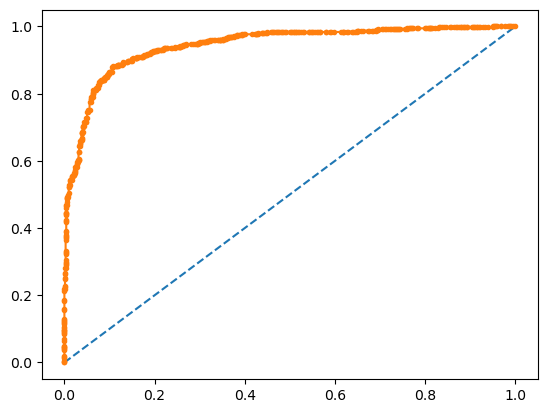

In [84]:
# predict probabilities
probs = Bag_model.predict_proba(X_train_res)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_train_res, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train_res, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

0.8144104803493449
[[105  25]
 [ 60 268]]
              precision    recall  f1-score   support

           0       0.64      0.81      0.71       130
           1       0.91      0.82      0.86       328

    accuracy                           0.81       458
   macro avg       0.78      0.81      0.79       458
weighted avg       0.84      0.81      0.82       458



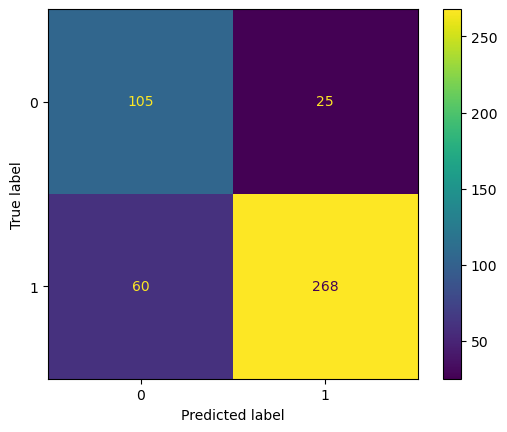

In [85]:
y_test_predict = Bag_model.predict(X_test)
model_score = Bag_model.score(X_test, y_test)                      ## Accuracy
cm = metrics.confusion_matrix(y_test, y_test_predict)
print(model_score)
print(cm)          ## confusion_matrix
print(metrics.classification_report(y_test, y_test_predict))     ## classification_report
dis = ConfusionMatrixDisplay(cm)
dis.plot()

AUC: 0.894


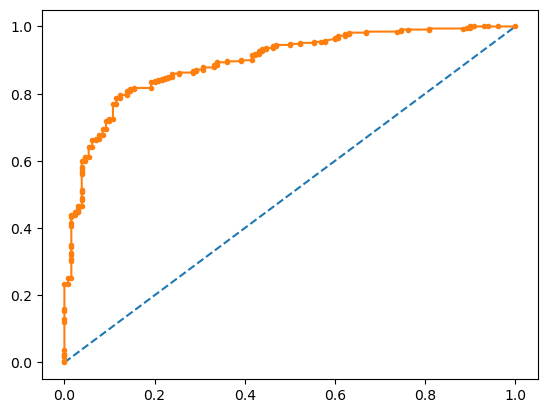

In [86]:
# predict probabilities
probs = Bag_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curveac
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, probs,  pos_label=1)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

## Gradient Boosting with Smote

In [87]:
gb_model = GradientBoostingClassifier(random_state=1)
gb_model = gb_model.fit(X_train_res, y_train_res)

0.8959183673469387
[[673  62]
 [ 91 644]]
              precision    recall  f1-score   support

           0       0.88      0.92      0.90       735
           1       0.91      0.88      0.89       735

    accuracy                           0.90      1470
   macro avg       0.90      0.90      0.90      1470
weighted avg       0.90      0.90      0.90      1470



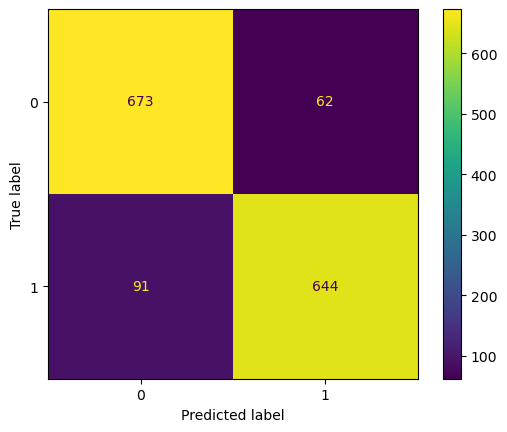

In [88]:
## Performance Matrix on train data set
y_train_predict = gb_model.predict(X_train_res)
model_score = gb_model.score(X_train_res, y_train_res)
cm = metrics.confusion_matrix(y_train_res, y_train_predict)
print(model_score)
print(cm)
print(metrics.classification_report(y_train_res, y_train_predict))
dis = ConfusionMatrixDisplay(cm)
dis.plot()

AUC: 0.960


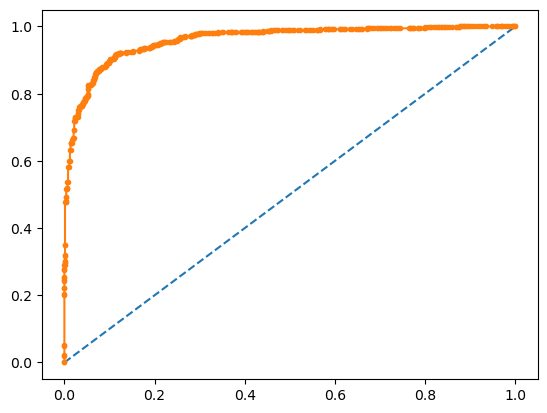

In [89]:
# predict probabilities
probs = gb_model.predict_proba(X_train_res)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_train_res, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train_res, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

0.8078602620087336
[[107  23]
 [ 65 263]]
              precision    recall  f1-score   support

           0       0.62      0.82      0.71       130
           1       0.92      0.80      0.86       328

    accuracy                           0.81       458
   macro avg       0.77      0.81      0.78       458
weighted avg       0.84      0.81      0.81       458



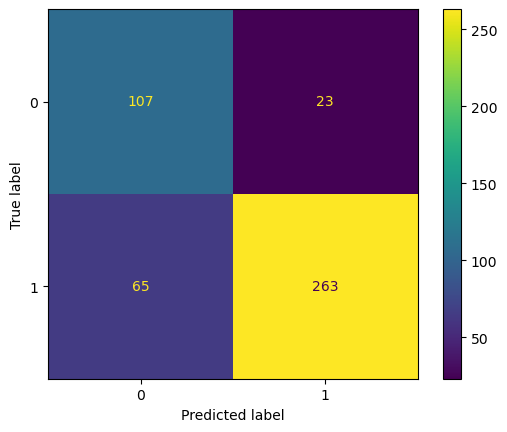

In [90]:
## Performance Matrix on test data set
y_test_predict = gb_model.predict(X_test)
model_score = gb_model.score(X_test, y_test)
cm = metrics.confusion_matrix(y_test, y_test_predict)
print(model_score)
print(cm)
print(metrics.classification_report(y_test, y_test_predict))
dis = ConfusionMatrixDisplay(cm)
dis.plot()

AUC: 0.891


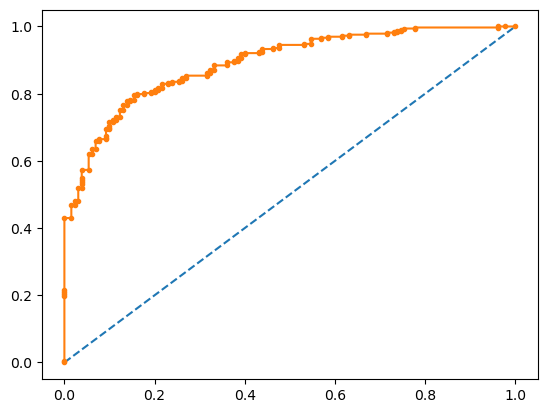

In [91]:
# predict probabilities
probs = gb_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

## Ada Boosting with Smote

In [92]:
Adj_model = AdaBoostClassifier(n_estimators=100,random_state=1)
Adj_model.fit(X_train_res, y_train_res)

AdaBoostClassifier(n_estimators=100, random_state=1)

0.8503401360544217
[[627 108]
 [112 623]]
              precision    recall  f1-score   support

           0       0.85      0.85      0.85       735
           1       0.85      0.85      0.85       735

    accuracy                           0.85      1470
   macro avg       0.85      0.85      0.85      1470
weighted avg       0.85      0.85      0.85      1470



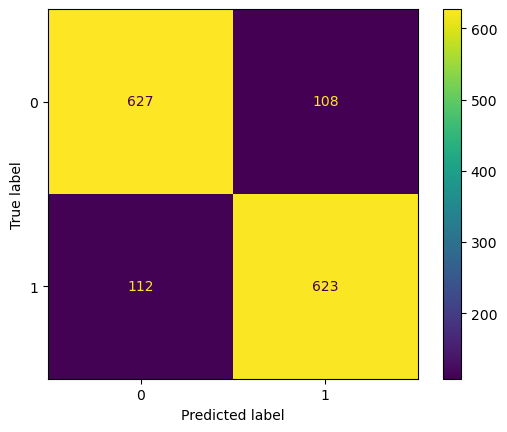

In [93]:
## Performance Matrix on train data set
y_train_predict = Adj_model.predict(X_train_res)
model_score = Adj_model.score(X_train_res, y_train_res)
cm = metrics.confusion_matrix(y_train_res, y_train_predict)
print(model_score)
print(cm)
print(metrics.classification_report(y_train_res, y_train_predict))
dis = ConfusionMatrixDisplay(cm)
dis.plot()

AUC: 0.929


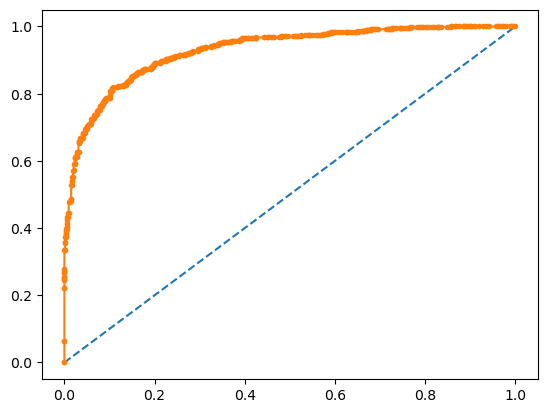

In [94]:
# predict probabilities
probs = Adj_model.predict_proba(X_train_res)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_train_res, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train_res, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

0.8034934497816594
[[101  29]
 [ 61 267]]
              precision    recall  f1-score   support

           0       0.62      0.78      0.69       130
           1       0.90      0.81      0.86       328

    accuracy                           0.80       458
   macro avg       0.76      0.80      0.77       458
weighted avg       0.82      0.80      0.81       458



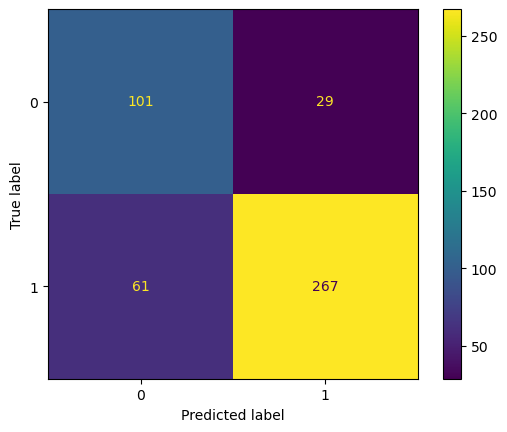

In [95]:
## Performance Matrix on test data set
y_test_predict = Adj_model.predict(X_test)
model_score = Adj_model.score(X_test, y_test)
cm = metrics.confusion_matrix(y_test, y_test_predict)
print(model_score)
print(cm)
print(metrics.classification_report(y_test, y_test_predict))
dis = ConfusionMatrixDisplay(cm)
dis.plot()

AUC: 0.868


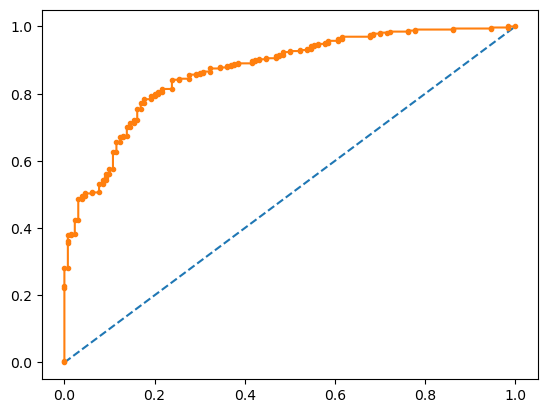

In [96]:
# predict probabilities
probs = Adj_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

## Comparison of Different Models

### On Train Data

Interest Class is 1 i.e. Vote = 1 i.e Labour 

Let's look at the performance of all the models on the Train Data set

Recall refers to the percentage of total relevant results correctly classified by the algorithm and hence we will compare Recall of class "1" for all models.

Naive Bayes: The recall is 0.88

              precision    recall  f1-score   support

           0       0.74      0.72      0.73       332
           1       0.88      0.88      0.88       735

    accuracy                           0.83      1067
       macro avg       0.81      0.80      0.80      1067
    weighted avg       0.83      0.83      0.83      1067

KNN:  The recall is 0.91

              precision    recall  f1-score   support

           0       0.77      0.64      0.70       332
           1       0.85      0.91      0.88       735

    accuracy                           0.83      1067
       macro avg       0.81      0.78      0.79      1067
    weighted avg       0.82      0.83      0.82      1067

Bagging: The recall is 1

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       332
           1       1.00      1.00      1.00       735

    accuracy                           1.00      1067
       macro avg       1.00      1.00      1.00      1067
    weighted avg       1.00      1.00      1.00      1067

Ada boosting: The recall is 0.91

              precision    recall  f1-score   support

           0       0.78      0.72      0.74       332
           1       0.88      0.91      0.89       735

    accuracy                           0.85      1067
       macro avg       0.83      0.81      0.82      1067
    weighted avg       0.84      0.85      0.85      1067

Gradient Boosting: The recall is 0.93

              precision    recall  f1-score   support

    0       0.84      0.79      0.81       332
    1       0.91      0.93      0.92       735

    accuracy                           0.89      1067
       macro avg       0.87      0.86      0.87      1067
    weighted avg       0.89      0.89      0.89      1067

Random Forest: The recall is  1

              precision    recall  f1-score   support

    0       1.00      1.00      1.00       332
    1       1.00      1.00      1.00       735

    accuracy                           1.00      1067
       macro avg       1.00      1.00      1.00      1067
    weighted avg       1.00      1.00      1.00      1067
    
### After Smote

Bagging: The recall is 0.90
        
        precision    recall  f1-score   support

           0       0.86      0.90      0.88       735
           1       0.90      0.86      0.88       735

    accuracy                           0.88      1470
    macro avg       0.88      0.88      0.88      1470
    weighted avg       0.88      0.88      0.88      1470

Ada Boosting: The recall is 0.85
           
           precision    recall  f1-score   support

           0       0.85      0.85      0.85       735
           1       0.85      0.85      0.85       735

    accuracy                           0.85      1470
    macro avg       0.85      0.85      0.85      1470
    weighted avg       0.85      0.85      0.85      1470
    
Gradint Boosting: The recall is 0.91

        precision    recall  f1-score   support

           0       0.88      0.92      0.90       735
           1       0.91      0.88      0.89       735

    accuracy                           0.90      1470
   macro avg       0.90      0.90      0.90      1470
weighted avg       0.90      0.90      0.90      1470



### On Test Data

Interest Class is 1 i.e. Vote = 1 i.e Labour 

Let's look at the performance of all the models on the Test Data set

Recall refers to the percentage of total relevant results correctly classified by the algorithm and hence we will compare Recall of class "1" for all models.

Naive Bayes: The recall is 0.87

                  precision    recall  f1-score   support

           0       0.68      0.72      0.70       130
           1       0.89      0.87      0.88       328

    accuracy                           0.83       458
        macro avg       0.78      0.79      0.79       458
    weighted avg       0.83      0.83      0.83       458

KNN: Recall is 0.88

              precision    recall  f1-score   support

           0       0.68      0.65      0.66       130
           1       0.86      0.88      0.87       328

        accuracy                           0.81       458
       macro avg       0.77      0.76      0.77       458
    weighted avg       0.81      0.81      0.81       458

Bagging: The recall is 0.86

              precision    recall  f1-score   support

           0       0.64      0.64      0.64       130
           1       0.86      0.86      0.86       328

    accuracy                           0.80       458
       macro avg       0.75      0.75      0.75       458
    weighted avg       0.80      0.80      0.80       458

Ada Boosting: The recall is 0.87

              precision    recall  f1-score   support

           0       0.68      0.69      0.68       130
           1       0.88      0.87      0.87       328

    accuracy                           0.82       458
       macro avg       0.78      0.78      0.78       458
    weighted avg       0.82      0.82      0.82       458

Gradient Boosting: The recall is 0.87

           precision    recall  f1-score   support

    0       0.69      0.74      0.71       130
    1       0.89      0.87      0.88       328

    accuracy                           0.83       458
       macro avg       0.79      0.80      0.80       458
    weighted avg       0.84      0.83      0.83       458

Random Forest: The recall is 0.87

                 precision    recall  f1-score   support

    0       0.68      0.69      0.69       130
    1       0.88      0.87      0.87       328

    accuracy                           0.82       458
       macro avg       0.78      0.78      0.78       458
    weighted avg       0.82      0.82      0.82       458
    
### After Smote 
Bagging: The recall is 0.91

      precision    recall  f1-score   support

           0       0.64      0.81      0.71       130
           1       0.91      0.82      0.86       328

    accuracy                           0.81       458
    macro avg       0.78      0.81      0.79       458
    weighted avg       0.84      0.81      0.82       458

Ada Boosting: The recall is 0.90
        
        precision    recall  f1-score   support
           0       0.62      0.78      0.69       130
           1       0.90      0.81      0.86       328
    accuracy                           0.80       458
    macro avg       0.76      0.80      0.77       458
    weighted avg       0.82      0.80      0.81       458

Gradient Boosting: The recall is 0.92
        
        precision    recall  f1-score   support
           0       0.62      0.82      0.71       130
           1       0.92      0.80      0.86       328
     accuracy                           0.81       458
     macro avg       0.77      0.81      0.78       458
     weighted avg       0.84      0.81      0.81       458



Model  have  performed similar on the train data set , and on the test data set. However Random Forest and Bagging which had a 100% score on the train data set have shown a less result on the test data set .. Hence a  case of overfitting.

From all the inferences above, we see that mostly all the models have similar performance. However, the Gradient boosting after Smote model is giving the best results on accuracy.


### Best model selection:
With this, it is also very clear that the Gradient Boosting model has performed above all the rest of the models. With an Accuracy value of 90%, it is predicting the highest percentage of both our classes of interest. If we still look at the Recall value, the model is able to identify 91% of the true positives correctly. Similarly, we see that the Area Under the Curve (AUC) captured is 96% for train data and 89% for the test data. It is not the best however; it still supersedes all the other models. Therefore, it is safe to say that this model can be used for making predictions on any unseen data that is fed to the model.


### Important feature selection on final model.

In [97]:
# Get feature importances
importances = gb_model.feature_importances_

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(feature_importance_df)

                       Feature  Importance
3                        Blair    0.336512
4                        Hague    0.229542
5                       Europe    0.146253
0                          age    0.082811
1       national_economic_cond    0.075715
6          political_knowledge    0.068156
2  national_economic_household    0.047618
7                  gender_male    0.013393


## Conclude with the key takeaways for the business
1)  Age Influence: After the analysis on age factor, age ranging from youth to old they tend to follow the pattern of voting to particular party. From the model it shows Labour leader shows majority. 
2) Economic Perception: 
a) National Economic Conditions: The economic condition like GDP, Inflation rate etc how these are affected by choosing the particular part based on that we could see voting behaviour. 
b) Household Economic Conditions: Insights into how people perceive their household economic conditions can affect consumer behaviour and spending patterns. How Good the middle class or below poverty people can survive with the fluctuation is countries economy.
3) Voting Trends: Distribution of Votes: By analysis the model predict that the Conservative is less preferred over Labour by the majority. By this we could understand the public sentiment over the government.
4)Election Candidate Ratings
Blair is getting more vote from labour leader and the way they have rated is 4. So the service to public is good and this leadership can be trusted by public.
Hague is getting more vote in labour leader and the way they have rated is 2. So, the service to public is not so good. Only 300 people think he is fine. But 500+ people believe he is not good fit.
5) Gender Distribution:
Voting by Gender: Female is more compared to male. The voting trend goes more in Labour by female. The party can target more female for campaigns and products which focuses more on female.
6) Political Knowledge Levels: The average level of political knowledge among citizens can affect how informed the public is about policy changes, and other decision changes which in turn influences business regulations and compliance.
7) Opinions on Europe: Europe Opinion on how the integration into their culture, business will have huge impact on business decisions related to international trade and market expansion. The people are diverse and few of them are sceptic about this integration and few are okay with trend.

With the model choose we could see that the model is able to capture 89% of the data correctly.


# Problem 2
In this particular project, we are going to work on the inaugural corpora from the nltk in Python. We will be looking at the following speeches of the Presidents of the United States of America:
1. President Franklin D. Roosevelt in 1941
2. President John F. Kennedy in 1961
3. President Richard Nixon in 1973

    Code Snippet to extract the three speeches:
"
import nltk
nltk.download('inaugural')
from nltk.corpus import inaugural
inaugural.fileids()
inaugural.raw('1941-Roosevelt.txt')
inaugural.raw('1961-Kennedy.txt')
inaugural.raw('1973-Nixon.txt')
"
If the above code doesn't work, use data: Speeches


In [98]:
import nltk
nltk.download('inaugural')
from nltk.corpus import inaugural, stopwords
from collections import Counter
import string
from nltk.stem.snowball import SnowballStemmer
import json
import re

[nltk_data] Downloading package inaugural to
[nltk_data]     C:\Users\subra\AppData\Roaming\nltk_data...
[nltk_data]   Package inaugural is already up-to-date!


### Problem 2 - Define the problem and Perform Exploratory Data Analysis
-Problem Definition - Find the number of Character, words & sentences in all three speeches

In [99]:
# Function to calculate characters, words, and sentences
def analyze_speech(fileid):
    text = inaugural.raw(fileid)
    num_chars = len(text)
    num_words = len(nltk.word_tokenize(text))
    num_sentences = len(nltk.sent_tokenize(text))
    return num_chars, num_words, num_sentences

In [100]:
# Analyze each speech
roosevelt_speech = analyze_speech('1941-Roosevelt.txt')
kennedy_speech = analyze_speech('1961-Kennedy.txt')
nixon_speech = analyze_speech('1973-Nixon.txt')

In [101]:
# Display results
print(f"Roosevelt: Characters = {roosevelt_speech[0]}, Words = {roosevelt_speech[1]}, Sentences = {roosevelt_speech[2]}")
print(f"Kennedy: Characters = {kennedy_speech[0]}, Words = {kennedy_speech[1]}, Sentences = {kennedy_speech[2]}")
print(f"Nixon: Characters = {nixon_speech[0]}, Words = {nixon_speech[1]}, Sentences = {nixon_speech[2]}")

Roosevelt: Characters = 7571, Words = 1526, Sentences = 68
Kennedy: Characters = 7618, Words = 1543, Sentences = 52
Nixon: Characters = 9991, Words = 2006, Sentences = 68


### Problem 2 - Text cleaning
- Stopword removal - Stemming - find the 3 most common words used in all three speeches

In [102]:
stopwords = nltk.corpus.stopwords.words('english') +list(string.punctuation)
stemmer = SnowballStemmer("english")

def preprocess_text(fileid):
    text = inaugural.raw(fileid)
    words = nltk.word_tokenize(text)
    words_lower = [word.lower() for word in words]
    filtered_words = [word for word in words_lower if word not in stopwords]
    all_words_freq = nltk.FreqDist(filtered_words)
    stemmed_words = [stemmer.stem(word) for word in filtered_words]
    return stemmed_words

In [103]:
all_words = []
for fileid in ['1941-Roosevelt.txt', '1961-Kennedy.txt', '1973-Nixon.txt']:
    all_words.extend(preprocess_text(fileid))

In [104]:
# Find the three most common words in all three speeches
roosevelt_words = preprocess_text('1941-Roosevelt.txt')
kennedy_words = preprocess_text('1961-Kennedy.txt')
nixon_words = preprocess_text('1973-Nixon.txt')

most_common_words = Counter(all_words).most_common(3)
print("The three most common words in all three speeches combined are",most_common_words)
print("\n")
# Find the most common words
roosevelt_common = Counter(roosevelt_words).most_common(3)
kennedy_common = Counter(kennedy_words).most_common(3)
nixon_common = Counter(nixon_words).most_common(3)

print("The three most common words in Roosevelt speech are:", roosevelt_common)
print("The three most common words in Kennedy speech are:", kennedy_common)
print("The three most common words in Nixon speech are:", nixon_common)


The three most common words in all three speeches combined are [('--', 67), ('us', 46), ('nation', 40)]


The three most common words in Roosevelt speech are: [('--', 25), ('nation', 17), ('know', 10)]
The three most common words in Kennedy speech are: [('--', 25), ('let', 16), ('us', 12)]
The three most common words in Nixon speech are: [('us', 26), ('let', 22), ('america', 21)]


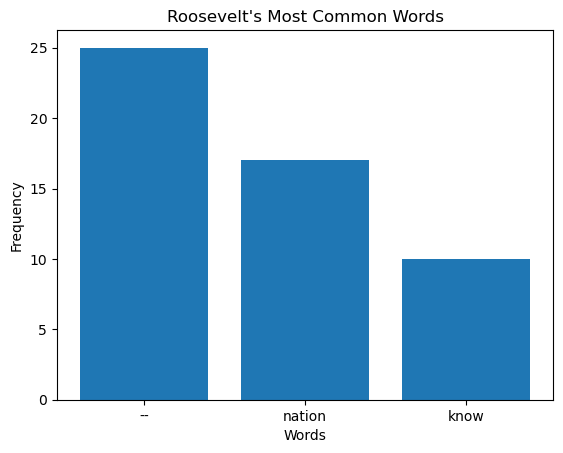

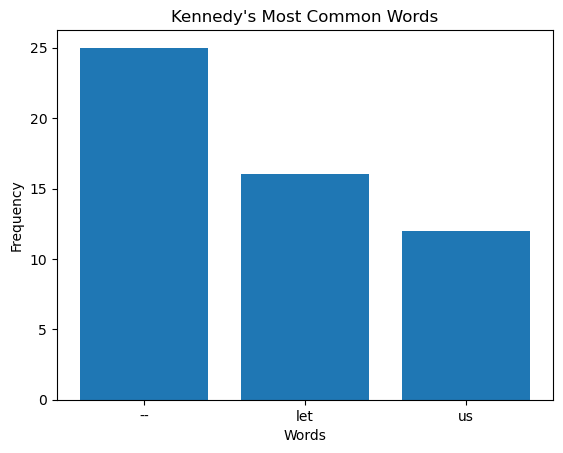

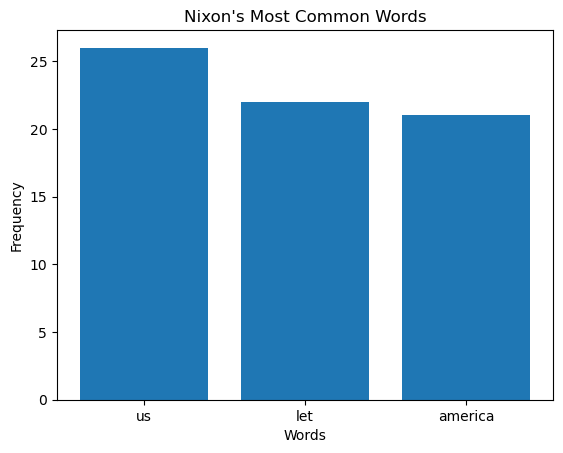

In [105]:
# Plot word frequencies
def plot_word_frequencies(word_counts, title):
    words, counts = zip(*word_counts)
    plt.bar(words, counts)
    plt.title(title)
    plt.xlabel('Words')
    plt.ylabel('Frequency')
    plt.show()

plot_word_frequencies(roosevelt_common, "Roosevelt's Most Common Words")
plot_word_frequencies(kennedy_common, "Kennedy's Most Common Words")
plot_word_frequencies(nixon_common, "Nixon's Most Common Words")


### Problem 2 - Plot Word cloud of all three speeches
- Show the most common words used in all three speeches in the form of word clouds

In [106]:
from wordcloud import WordCloud

Word Cloud for speeches (after cleaning)!!


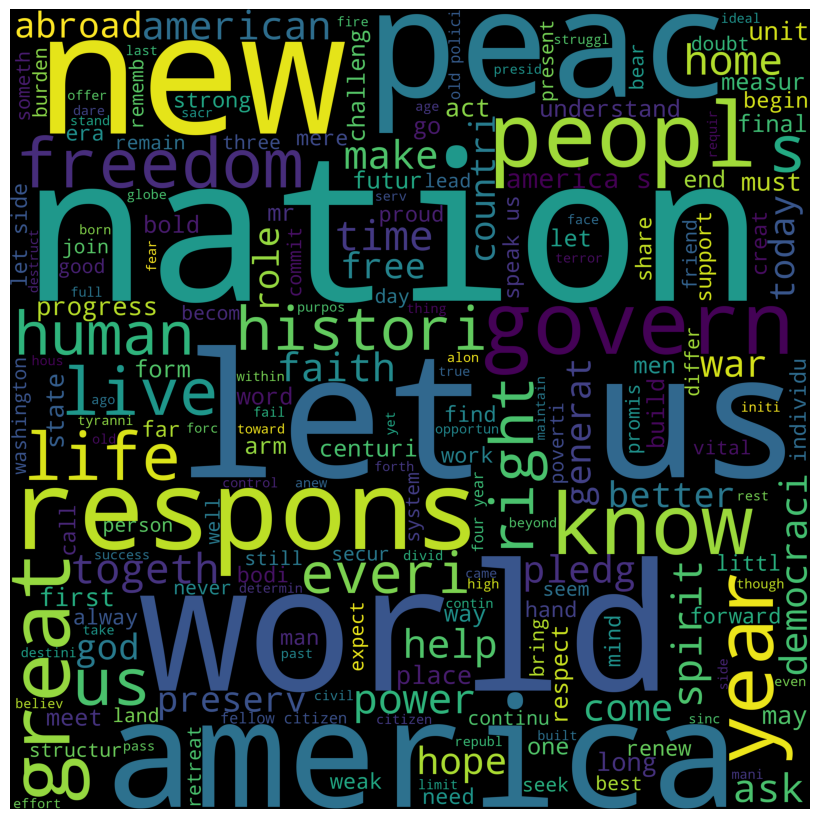

In [107]:
# Word Cloud 
wc_a = ' '.join(all_words)


wordcloud = WordCloud(width = 3000, height = 3000, 
                background_color ='black', 
                min_font_size = 10, random_state=100).generate(wc_a) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off")
plt.xlabel('Word Cloud')
plt.tight_layout(pad = 0) 

print("Word Cloud for speeches (after cleaning)!!")
plt.show()

In [108]:
wordcloud.words_

{'nation': 1.0,
 'world': 0.725,
 'let us': 0.7,
 'new': 0.675,
 'america': 0.6,
 'peac': 0.6,
 'respons': 0.45,
 'peopl': 0.425,
 'govern': 0.4,
 'know': 0.375,
 'great': 0.375,
 'year': 0.35,
 'freedom': 0.35,
 's': 0.325,
 'us': 0.325,
 'live': 0.325,
 'life': 0.325,
 'histori': 0.3,
 'human': 0.3,
 'right': 0.3,
 'everi': 0.3,
 'togeth': 0.275,
 'time': 0.275,
 'spirit': 0.275,
 'home': 0.275,
 'power': 0.275,
 'american': 0.25,
 'faith': 0.25,
 'make': 0.25,
 'help': 0.25,
 'ask': 0.25,
 'come': 0.225,
 'democraci': 0.225,
 'hope': 0.225,
 'war': 0.225,
 'pledg': 0.225,
 'preserv': 0.2,
 'better': 0.2,
 'free': 0.2,
 'generat': 0.2,
 'countri': 0.2,
 'god': 0.2,
 'today': 0.2,
 'role': 0.2,
 'abroad': 0.2,
 'america s': 0.2,
 'unit': 0.175,
 'state': 0.175,
 'place': 0.175,
 'may': 0.175,
 'act': 0.175,
 'progress': 0.175,
 'must': 0.175,
 'first': 0.175,
 'long': 0.175,
 'measur': 0.15,
 'men': 0.15,
 'form': 0.15,
 'futur': 0.15,
 'bold': 0.15,
 'understand': 0.15,
 'way': 0.15,